In [2]:
import pandas as pd
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
DPI=300

In [3]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/GSVA/")
DIR2SAVE.mkdir(parents=True, exist_ok=True)

FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [3]:
# read in tcga data: columns = patients, index = gene names but ensmeble and last column = Gene Name
tcga_exp = pd.read_parquet("/data/BCI-CRC/SO/data/public/TCGA/COADREAD_TPonly_uniquePatients_zscore.parquet")
tcga_exp.head(3)

TCGA-A6-5664  TCGA-D5-6530  TCGA-AA-3556  TCGA-AA-3818  \
index                                                                        
ENSG00000000003.15     -0.947482     -1.552415     -0.133085      0.828211   
ENSG00000000005.6      -0.785193     -1.310053      0.037304      1.405941   
ENSG00000000419.13     -1.324709     -1.237521      0.312150     -0.289543   

                    TCGA-AA-3660  TCGA-DM-A28G  TCGA-AA-3976  TCGA-G4-6307  \
index                                                                        
ENSG00000000003.15      0.107183      0.153849      1.481817      0.660882   
ENSG00000000005.6      -0.639623      0.737881      0.820617      0.025309   
ENSG00000000419.13      0.143101     -0.607545      1.398614     -0.099116   

                    TCGA-AA-3522  TCGA-AA-3530  ...  TCGA-CI-6623  \
index                                           ...                 
ENSG00000000003.15      0.417695      0.984411  ...      0.701069   
ENSG00000000005.6       0.176256      0.151691  ...     -0.329749   
ENSG00000000419.13     -0.050033      0.434238  ...      1.943809   

                    TCGA-AH-6643  TCGA-DY-A0XA  TCGA-AH-6897  TCGA-AH-6903  \
index                                                                        
ENSG00000000003.15     -0.348427      0.874687      0.443539      0.823830   
ENSG00000000005.6      -1.598067     -0.170324      2.777399     -1.088029   
ENSG00000000419.13     -0.145974      0.930454      0.489420      0.062678   

                    TCGA-AG-3609  TCGA-AG-3605  TCGA-AG-3894  TCGA-AG-3574  \
index                                                                        
ENSG00000000003.15      0.613325      1.677158      0.328236      1.686084   
ENSG00000000005.6       0.225478     -1.175697     -0.014784     -0.730985   
ENSG00000000419.13      1.145744      0.081625     -0.456520      0.793907   

                      Gene  
index                       
ENSG00000000003.15  TSPAN6  
ENSG00000000005.6     TNMD  
ENSG00000000419.13    DPM1  

[3 rows x 610 columns]

In [4]:
# Write the DataFrame to a TSV file
tcga_exp.to_csv(DIR2SAVE.joinpath("TCGA_COADREAD_TPonly_uniquePatients_zscore.tsv"), sep='\t', index=True)

In [5]:
# read in tcga data: columns = patients, index = gene names but ensmeble and last column = Gene Name
tcga_exp_deseq2 = pd.read_csv("/data/BCI-CRC/SO/data/public/TCGA/COADREAD_TPonly_VST2.csv")
tcga_exp_deseq2.index.rename("index", inplace=True)

tcga_exp_deseq2.rename(columns={"gene_name": "Gene"}, inplace=True)

# Write the DataFrame to a TSV file
tcga_exp_deseq2.to_csv(DIR2SAVE.joinpath("TCGA_COADREAD_TPonly_VST2.tsv"), sep='\t', index=True)

In [6]:
tcga_exp_deseq2.head(3)

TCGA-A6-5664-01A-21R-1839-07  \
index                                              
ENSG00000000003.15                     11.281014   
ENSG00000000005.6                       4.810162   
ENSG00000000419.13                      9.751621   

                    TCGA-D5-6530-01A-11R-1723-07  \
index                                              
ENSG00000000003.15                     10.714535   
ENSG00000000005.6                       4.228887   
ENSG00000000419.13                      9.813223   

                    TCGA-AA-3556-01A-01R-0821-07  \
index                                              
ENSG00000000003.15                     12.043642   
ENSG00000000005.6                       5.721065   
ENSG00000000419.13                     10.908125   

                    TCGA-AA-3818-01A-01R-0905-07  \
index                                              
ENSG00000000003.15                     12.943830   
ENSG00000000005.6                       7.236811   
ENSG00000000419.13                     10.483006   

                    TCGA-AA-3660-01A-01R-1723-07  \
index                                              
ENSG00000000003.15                     12.268636   
ENSG00000000005.6                       4.971379   
ENSG00000000419.13                     10.788686   

                    TCGA-DM-A28G-01A-11R-A16W-07  \
index                                              
ENSG00000000003.15                     12.312336   
ENSG00000000005.6                       6.496945   
ENSG00000000419.13                     10.258325   

                    TCGA-AA-3976-01A-01R-1022-07  \
index                                              
ENSG00000000003.15                     13.555887   
ENSG00000000005.6                       6.588574   
ENSG00000000419.13                     11.675754   

                    TCGA-G4-6307-01A-11R-1723-07  \
index                                              
ENSG00000000003.15                     12.787138   
ENSG00000000005.6                       5.707782   
ENSG00000000419.13                     10.617550   

                    TCGA-AA-3522-01A-01R-0821-07  \
index                                              
ENSG00000000003.15                     12.559410   
ENSG00000000005.6                       5.874953   
ENSG00000000419.13                     10.652229   

                    TCGA-AA-3530-01A-01R-1022-07  ...  \
index                                             ...   
ENSG00000000003.15                     13.090101  ...   
ENSG00000000005.6                       5.847748  ...   
ENSG00000000419.13                     10.994386  ...   

                    TCGA-CI-6623-01B-11R-1830-07  \
index                                              
ENSG00000000003.15                     12.824770   
ENSG00000000005.6                       5.314560   
ENSG00000000419.13                     12.060955   

                    TCGA-AH-6643-01A-11R-1830-07  \
index                                              
ENSG00000000003.15                     11.841988   
ENSG00000000005.6                       3.909915   
ENSG00000000419.13                     10.584443   

                    TCGA-DY-A0XA-01A-11R-A155-07  \
index                                              
ENSG00000000003.15                     12.987351   
ENSG00000000005.6                       5.491121   
ENSG00000000419.13                     11.344981   

                    TCGA-AH-6897-01A-11R-1928-07  \
index                                              
ENSG00000000003.15                     12.583610   
ENSG00000000005.6                       8.755682   
ENSG00000000419.13                     11.033374   

                    TCGA-AH-6903-01A-11R-1928-07  \
index                                              
ENSG00000000003.15                     12.939728   
ENSG00000000005.6                       4.474775   
ENSG00000000419.13                     10.731864   

                    TCGA-AG-3609-01A-02R-0826-07  \
index                       

In [7]:
### Get primary DEGs for each cell type/cancer cell state from sam's file
degs = pd.read_excel('/data/BCI-CRC/SO/data/CRC_multiome/ArchR_final_analysis/DEGs/primaryAllCells_DEGs_seurat_wilcoxon.xlsx',
                     sheet_name=None,
                    )

In [8]:
degs['ipEMT']

p_val  avg_log2FC  pct.1  pct.2      p_val_adj cluster  \
0      0.000000e+00    3.612031  0.587  0.043   0.000000e+00   ipEMT   
1      0.000000e+00    3.237011  0.928  0.506   0.000000e+00   ipEMT   
2      0.000000e+00    3.217434  0.906  0.208   0.000000e+00   ipEMT   
3      0.000000e+00    3.099100  0.508  0.067   0.000000e+00   ipEMT   
4      0.000000e+00    2.982970  0.995  0.351   0.000000e+00   ipEMT   
...             ...         ...    ...    ...            ...     ...   
6796   2.236333e-85    0.250182  0.236  0.097   8.857891e-81   ipEMT   
6797  4.716437e-114    0.250180  0.225  0.078  1.868134e-109   ipEMT   
6798   6.963193e-82    0.250162  0.250  0.107   2.758051e-77   ipEMT   
6799  2.515450e-129    0.250158  0.224  0.072  9.963446e-125   ipEMT   
6800   2.838704e-42    0.250051  0.314  0.189   1.124382e-37   ipEMT   

          gene  pct.diff  
0         SAA1     0.544  
1        ISG15     0.422  
2         LCN2     0.698  
3         MMP7     0.441  
4        IFI27     0.644  
...        ...       ...  
6796    NIPAL3     0.139  
6797  SLC25A17     0.147  
6798   GATAD2B     0.143  
6799    ZNF692     0.152  
6800     MYLIP     0.125  

[6801 rows x 8 columns]

In [9]:
genes2consider = 100 #100 40
geneset_list = list()
for k in degs.keys():
    geneset_list.extend([(g, k) for g in degs[k]['gene'][:genes2consider]])
geneset_list

[('SAA1', 'ipEMT'),
 ('ISG15', 'ipEMT'),
 ('LCN2', 'ipEMT'),
 ('MMP7', 'ipEMT'),
 ('IFI27', 'ipEMT'),
 ('IFI6', 'ipEMT'),
 ('PI3', 'ipEMT'),
 ('RARRES3', 'ipEMT'),
 ('TFF2', 'ipEMT'),
 ('KRT19', 'ipEMT'),
 ('ASS1', 'ipEMT'),
 ('PDZK1IP1', 'ipEMT'),
 ('S100A6', 'ipEMT'),
 ('IFITM3', 'ipEMT'),
 ('KRT8', 'ipEMT'),
 ('IL32', 'ipEMT'),
 ('KRT18', 'ipEMT'),
 ('CXCL1', 'ipEMT'),
 ('C19orf33', 'ipEMT'),
 ('ANXA2', 'ipEMT'),
 ('LY6E', 'ipEMT'),
 ('PSMB9', 'ipEMT'),
 ('C15orf48', 'ipEMT'),
 ('S100A10', 'ipEMT'),
 ('WARS', 'ipEMT'),
 ('PIGR', 'ipEMT'),
 ('TSPAN1', 'ipEMT'),
 ('S100A11', 'ipEMT'),
 ('CXCL10', 'ipEMT'),
 ('SLPI', 'ipEMT'),
 ('PSME2', 'ipEMT'),
 ('CXCL3', 'ipEMT'),
 ('GPRC5A', 'ipEMT'),
 ('BST2', 'ipEMT'),
 ('TAP1', 'ipEMT'),
 ('CXCL11', 'ipEMT'),
 ('TSPAN8', 'ipEMT'),
 ('S100P', 'ipEMT'),
 ('TMSB10', 'ipEMT'),
 ('S100A16', 'ipEMT'),
 ('MUC1', 'ipEMT'),
 ('CEACAM6', 'ipEMT'),
 ('CLDN4', 'ipEMT'),
 ('TM4SF1', 'ipEMT'),
 ('CYSTM1', 'ipEMT'),
 ('CLDN7', 'ipEMT'),
 ('ATP1B1', 'ipEMT'),


In [10]:
### make a gene set df ? need columns member (which is gene name) and name (which is gene signature name)
geneset_df = pd.DataFrame(geneset_list, columns=['member', 'name'])
geneset_df.head(10)

member   name
0     SAA1  ipEMT
1    ISG15  ipEMT
2     LCN2  ipEMT
3     MMP7  ipEMT
4    IFI27  ipEMT
5     IFI6  ipEMT
6      PI3  ipEMT
7  RARRES3  ipEMT
8     TFF2  ipEMT
9    KRT19  ipEMT

In [11]:
set(degs['ipEMT']['gene'][:genes2consider]).intersection(set(degs['IL1B Mac']['gene'][:genes2consider]))

{'CCL20', 'CXCL1', 'CXCL3'}

In [12]:
set(degs['ipEMT']['gene'][:genes2consider]).intersection(set(degs['NLRP3 Mac']['gene'][:genes2consider]))

{'C15orf48', 'CCL20', 'CXCL10', 'CXCL3'}

In [13]:
set(degs['ipEMT']['gene'][:genes2consider]).intersection(set(degs['SPP1 Mac']['gene'][:genes2consider]))

{'C15orf48', 'CCL20', 'CSTB', 'CXCL3', 'IFI6'}

In [14]:
set(degs['ipEMT']['gene'][:genes2consider]).intersection(set(degs['Treg']['gene'][:genes2consider]))

{'IL32'}

In [11]:
# save geneset
geneset_df.to_csv(DIR2SAVE.joinpath(f"gene_signatures_{genes2consider}_DE_genes.tsv"), sep='\t', index=False)

# After running ~/code/CRC/scRNA-seq/Primary_CRC_dataset/A4_final_object/SC9_TCGA_GSVA.R
### read in gsva r results

In [4]:
genes2consider = 100 # 100, 50, 40

In [5]:
gsva_results = pd.read_csv(DIR2SAVE.joinpath(f"TCGA_gsva_results{genes2consider}.tsv"), sep="\t", index_col=0)

In [8]:
gsva_results.index

Index(['B', 'C1QC Mac', 'C3 iCAF', 'CD4 Tfh', 'CD4 Th', 'CD4 Th HSP',
       'CD4 Th17', 'CD4 Tn', 'CD8 Tem', 'CD8 Tem HSP', 'CD8 Tex', 'cDC1',
       'cDC2', 'Colonocyte', 'CXCL14 BMP CAF', 'Endo cycling', 'Enteric glial',
       'Enteroendocrine', 'FCGR3A Mono', 'FCN1 Mono', 'gdT', 'Goblet',
       'GREM1 HSP CAF', 'HLA high', 'HSP Mono', 'Hypoxia', 'IL1B Mac', 'ILC3',
       'Intermediate', 'ipEMT', 'Lymphatic endo', 'Mast', 'migDC', 'MMP CAF',
       'Myeloid cycling', 'Myofibroblast', 'Neutrophil', 'NK1', 'NK2', 'NKT',
       'NLRP3 Mac', 'pDC', 'pEMT', 'Pericyte', 'Plasma', 'PLTP LYVE1 Mac',
       'SMC', 'SPP1 Mac', 'Stalk-like endo', 'Stem', 'Stem (NOTUM high)',
       'Stromal cycling', 'T cycling', 'TA1', 'TA2', 'Tip-like endo', 'Treg',
       'Treg HSP', 'Tuft', 'UPR'],
      dtype='object', name='pathway')

In [9]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/GSVA')

In [42]:
gsva_results = gsva_results.T # we want columns to be signatures

# compute pairwise correlation and p-value and use permutation test 

Explanation of permutation tests: Permutation tests (also called exact tests, randomization tests, or re-randomization tests) are nonparametric test procedures to test the null hypothesis that two different groups come from the same distribution. A permutation test can be used for significance or hypothesis testing (including A/B testing) without requiring to make any assumptions about the sampling distribution (e.g., it doesn't require the samples to be normal distributed).



In [43]:
corr_method = "pearson" #"pearson" #"spearman"

In [18]:
from scipy import stats

columns_subset = ['ipEMT', 'Stem (NOTUM high)', 'pEMT', 'Stem', 'Colonocyte',
                  'Intermediate', 'Hypoxia', 'Stalk-like endo',
                  'Tip-like endo', 'Lymphatic endo', 'Pericyte', 'Myofibroblast', 'MMP CAF',
                  'SMC', 'C3 iCAF', 'NLRP3 Mac', 'C1QC Mac', 'SPP1 Mac', 
                  'IL1B Mac', 'migDC', 'PLTP LYVE1 Mac', 'Neutrophil', 'Treg', 'CD4 Th', 
                  'CD8 Tex', 'CD4 Tfh', 'CD4 Tn', 'CD8 Tem'
                 ]

corr_df = pd.DataFrame(index=columns_subset, columns=columns_subset)
pval_df = pd.DataFrame(index=columns_subset, columns=columns_subset)

for x in columns_subset:
    for y in columns_subset:
        if corr_method ==  "pearson":
            res = stats.pearsonr(gsva_results[x], gsva_results[y], 
                                 alternative='two-sided',
                                 method=stats.PermutationMethod(n_resamples=1000, random_state=7))
        if corr_method ==  "spearman":
            res = stats.spearmanr(gsva_results[x], gsva_results[y], 
                                 alternative='two-sided',
                                 )
        
        
        corr_df.loc[x,y] = res[0]
        pval_df.loc[x,y] = res[1]
        

KeyboardInterrupt: 

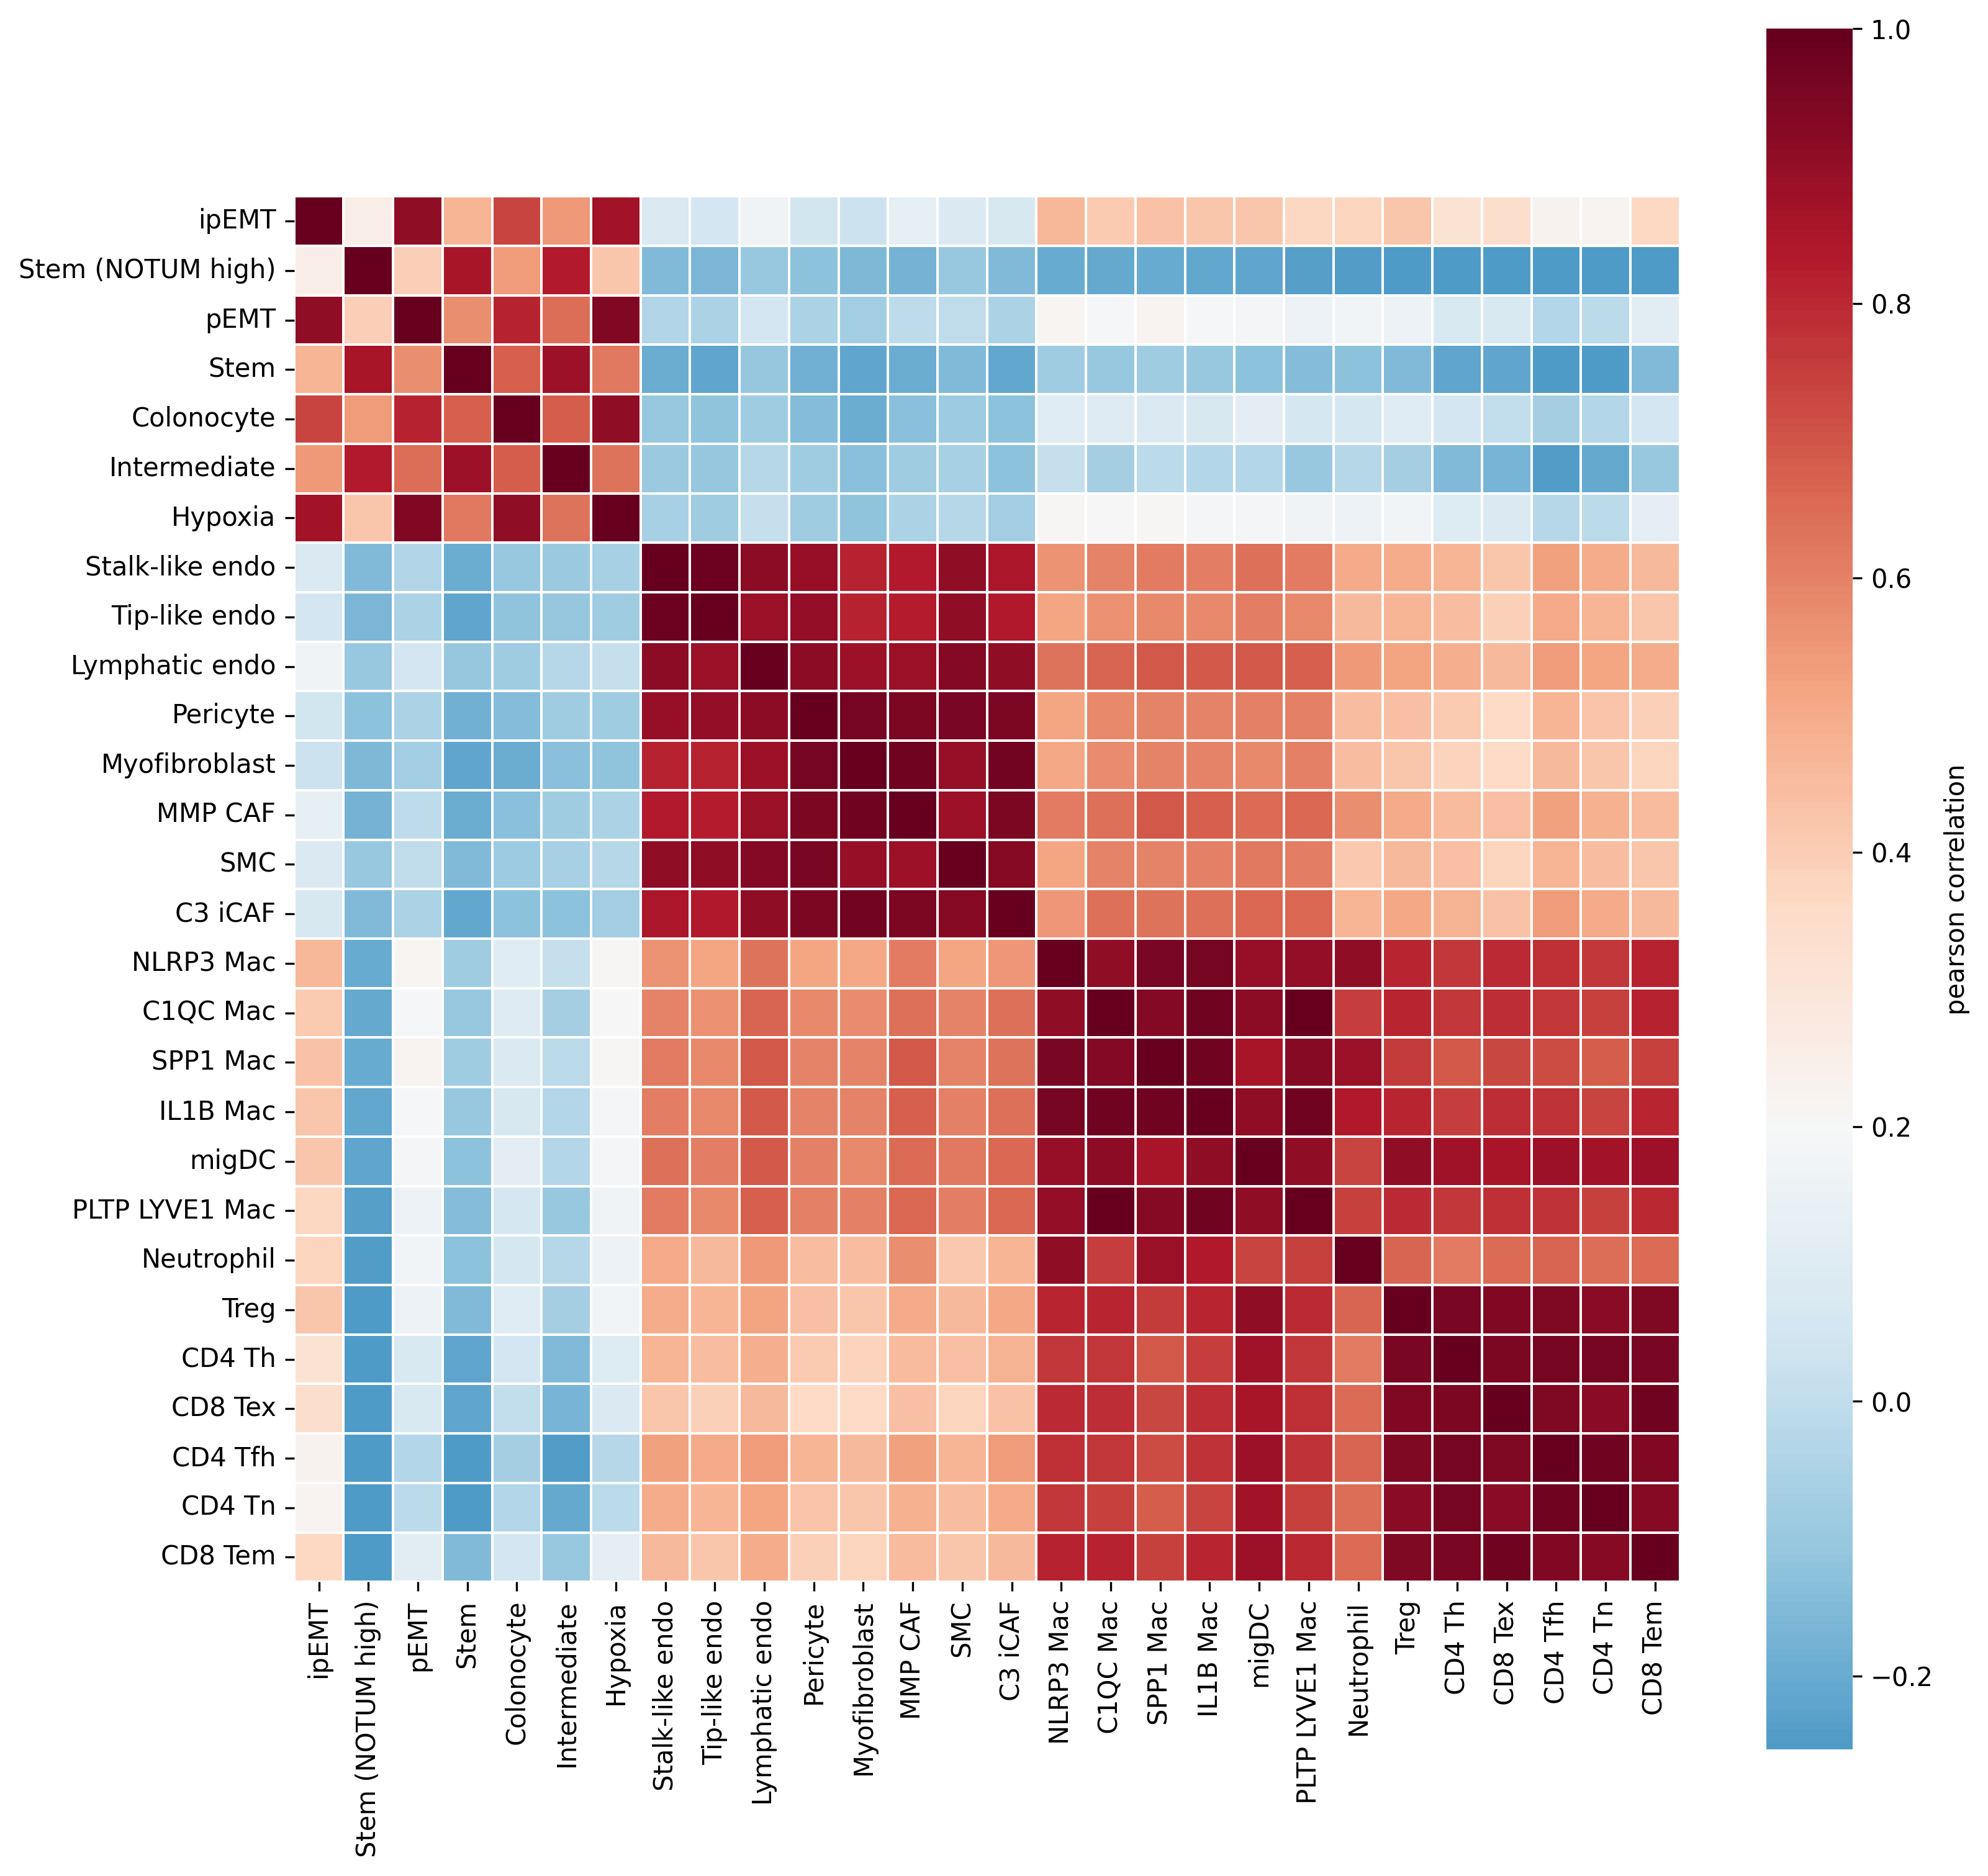

In [16]:
# plot heatmap of correlations:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(12,12))

sns.heatmap(data=corr_df.astype('float'), 
            cmap="RdBu_r", 
            center=0.2,
            robust=True,
            cbar_kws={'label': f'{corr_method} correlation'}, 
            square=True, 
            linewidths=.5,
            ax=ax
           )

    
fig.savefig(FIG2SAVE.joinpath(f"TCGA_GSVA_celltype_signatures_{corr_method}_correlation_heatmap_{genes2consider}_DE_genes_{corr_method}_RdBu_r.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

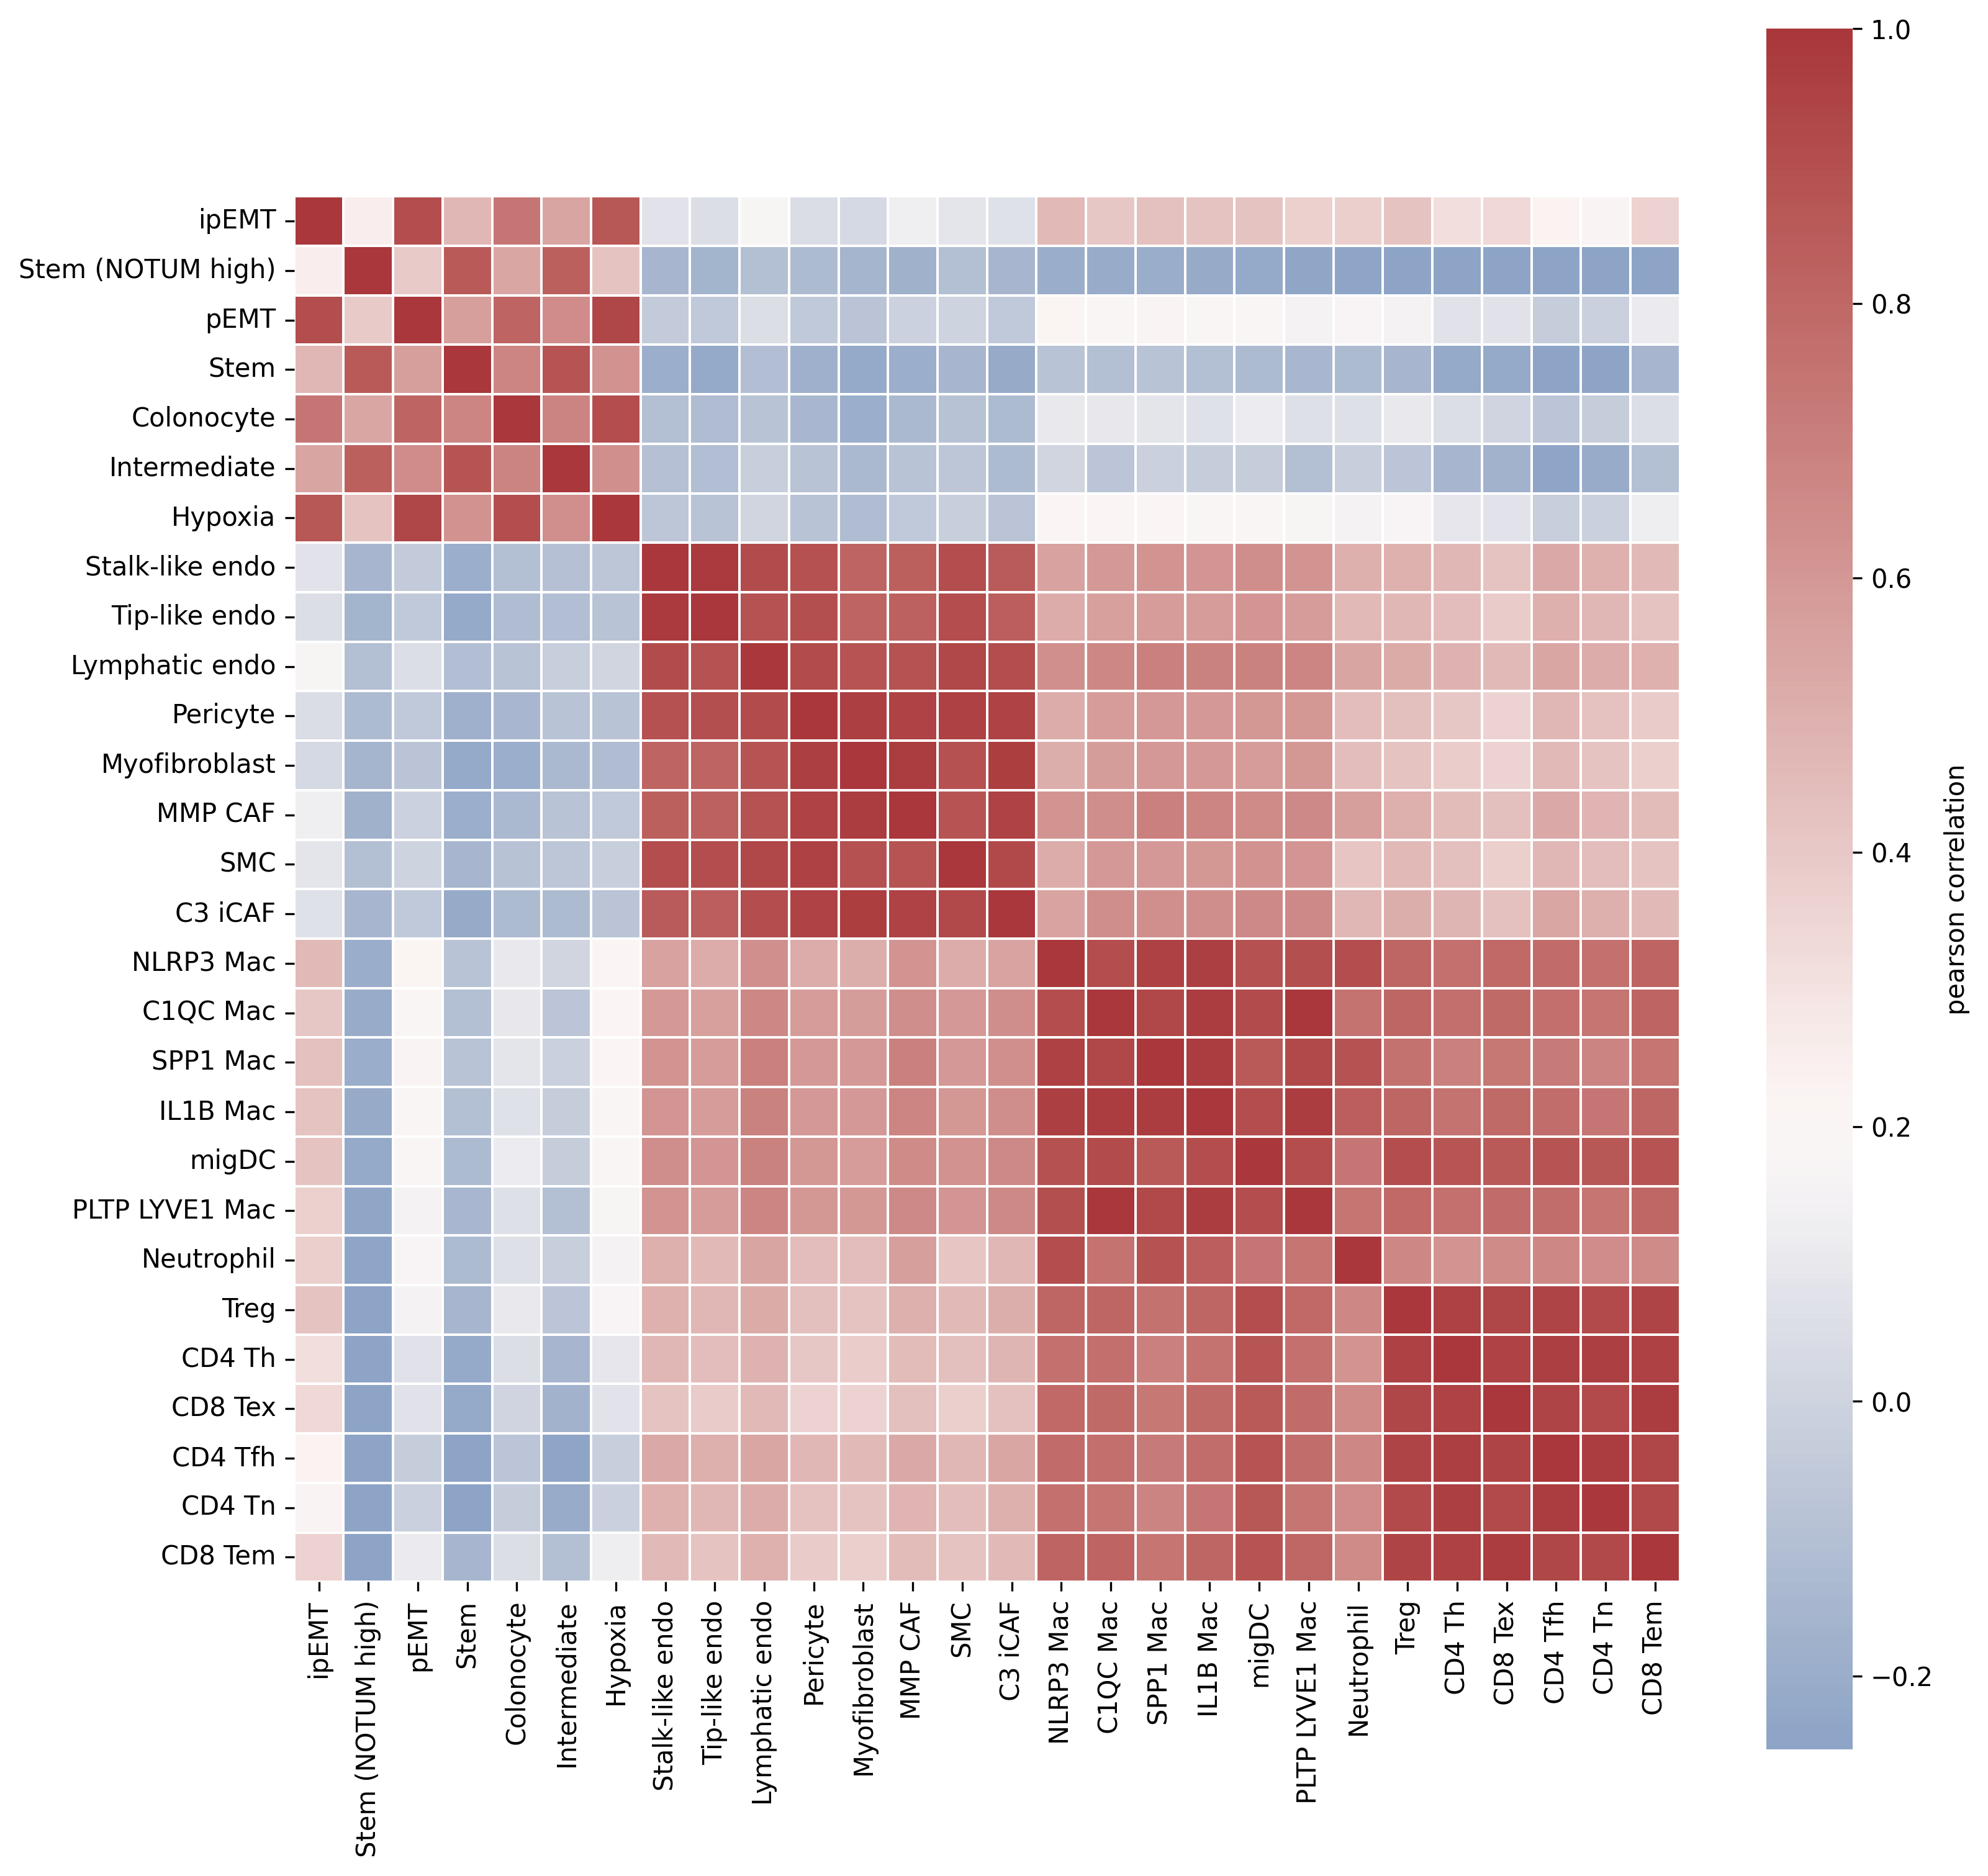

In [17]:
# plot heatmap of correlations:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(12,12))

sns.heatmap(data=corr_df.astype('float'), 
            cmap="vlag", 
            center=0.2,
            robust=True,
            cbar_kws={'label': f'{corr_method} correlation'}, 
            square=True, 
            linewidths=.5,
            ax=ax
           )

    
fig.savefig(FIG2SAVE.joinpath(f"TCGA_GSVA_celltype_signatures_{corr_method}_correlation_heatmap_{genes2consider}_DE_genes_{corr_method}.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [19]:
### save corr_df, pval_df to single excel file
with pd.ExcelWriter(
    path=DIR2SAVE.joinpath(f"TCGA_GSVA_celltype_signatures_{corr_method}_corr_pvals_{genes2consider}_DE_genes_{corr_method}.xlsx")) as writer:
    for i in zip((corr_df, pval_df), ("corr", "pval")):

        # get celltype of cluster
        # celltype = np.unique(adata[adata.obs['leiden']==cluster,:].obs['cell identity'])[0]

        i[0].to_excel(
            writer, sheet_name=f"{i[1]}"
        )

In [20]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/Primary_CRC_dataset/final_object/20mt/GSVA')

### Concentrating on certain cell types 

In [ ]:
# irecs recs with SPP1 Mac, Treg, IL1B Mac, CD8 Tex, Neutrophil, CD4 Tn, CD4 Th, CD4 Tfh

In [44]:
from scipy import stats

columns_subset = ['ipEMT', 'pEMT', 'Stem', 'Stem (NOTUM high)', 'NLRP3 Mac', 'SPP1 Mac', 
                  'IL1B Mac', 'Neutrophil', 'Treg', 'CD4 Th', 
                  'CD8 Tex', 'CD4 Tfh', 'CD4 Tn', 'CD8 Tem'
                 ]

corr_df = pd.DataFrame(index=columns_subset, columns=columns_subset)
pval_df = pd.DataFrame(index=columns_subset, columns=columns_subset)

for x in columns_subset:
    for y in columns_subset:
        if corr_method ==  "pearson":
            res = stats.pearsonr(gsva_results[x], gsva_results[y], 
                                 alternative='two-sided',
                                 method=stats.PermutationMethod(n_resamples=1000, random_state=7))
        if corr_method ==  "spearman":
            res = stats.spearmanr(gsva_results[x], gsva_results[y], 
                                 alternative='two-sided',
                                 )
        
        
        corr_df.loc[x,y] = res[0]
        pval_df.loc[x,y] = res[1]
        

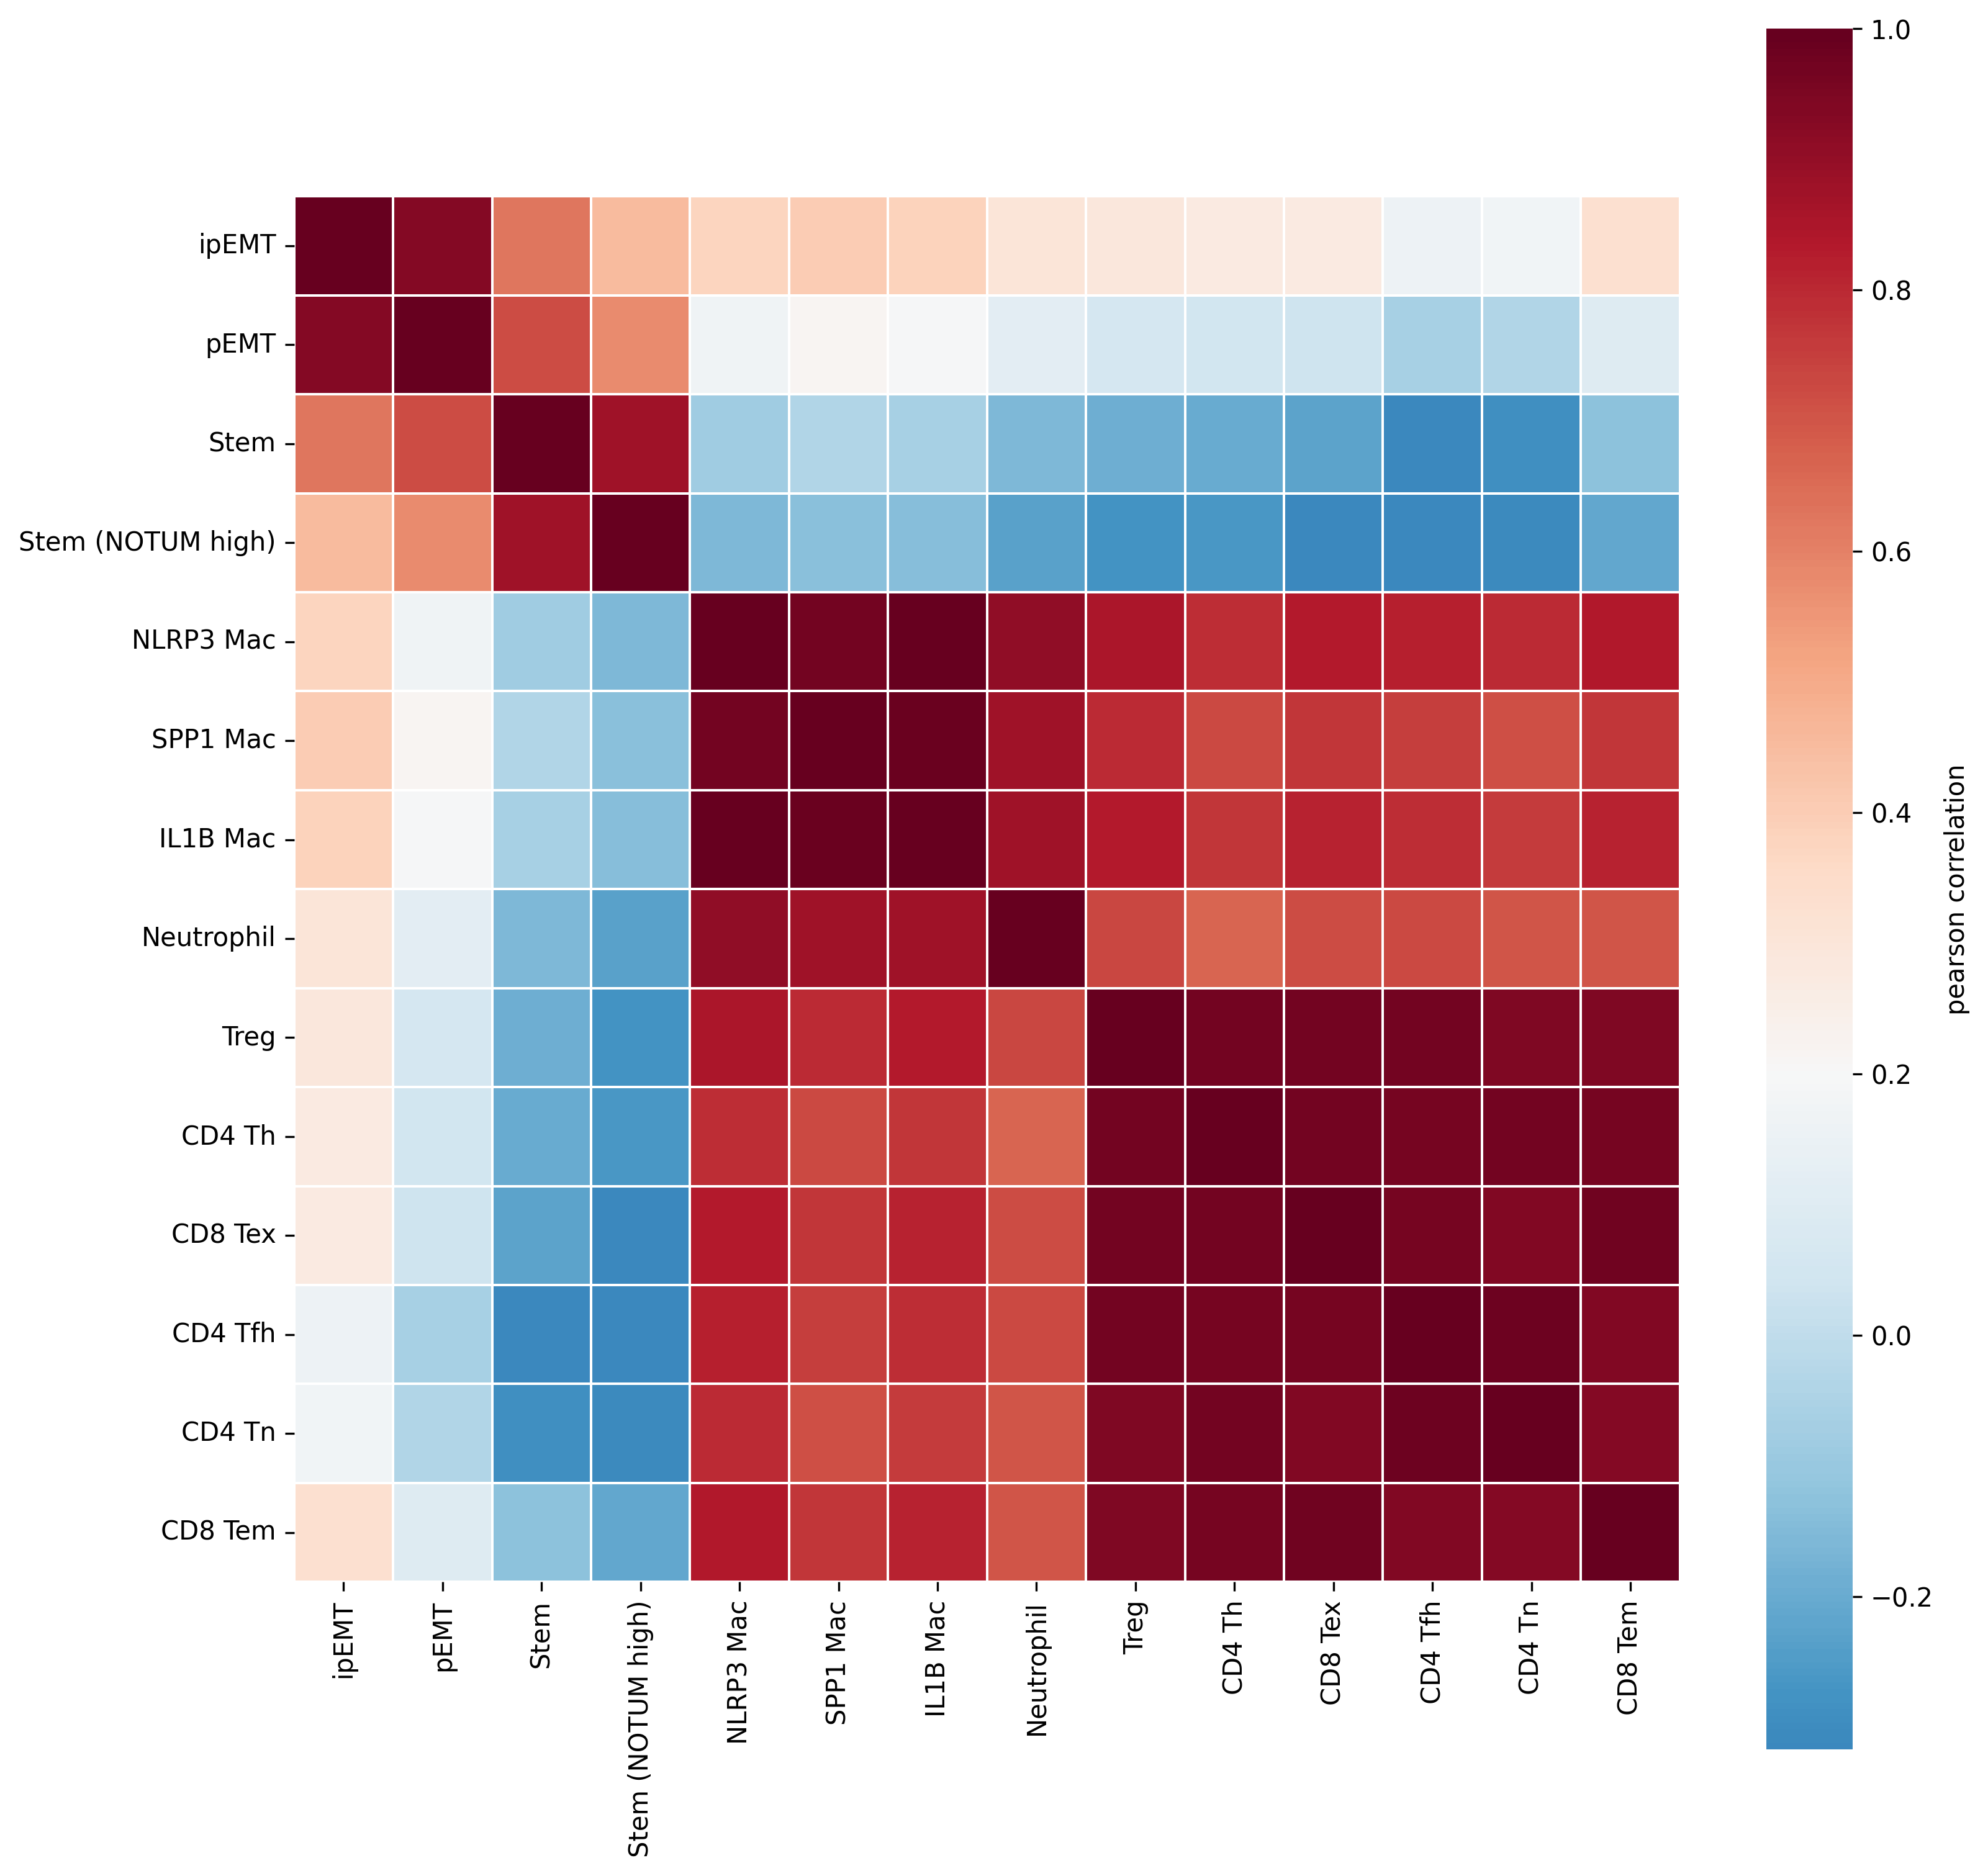

In [45]:
# plot heatmap of correlations:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(12,12))

sns.heatmap(data=corr_df.astype('float'), 
            cmap="RdBu_r", 
            center=0.2,
            robust=True,
            cbar_kws={'label': f'{corr_method} correlation'}, 
            square=True, 
            linewidths=.5,
            ax=ax
           )

    
fig.savefig(FIG2SAVE.joinpath(f"TCGA_GSVA_celltype_signatures_{corr_method}_correlation_heatmap_{genes2consider}_DE_genes_{corr_method}_RdBu_r_subset_iREC.pdf"), 
            dpi=DPI, 
            format="pdf",
            bbox_inches="tight")

In [46]:
gsva_results

pathway                              B  C1QC Mac   C3 iCAF   CD4 Tfh  \
TCGA-A6-5664-01A-21R-1839-07  0.691116  0.536402  0.745360  0.620443   
TCGA-D5-6530-01A-11R-1723-07  0.636329  0.438241 -0.401825  0.503421   
TCGA-AA-3556-01A-01R-0821-07  0.376584  0.281116 -0.213580 -0.131130   
TCGA-AA-3818-01A-01R-0905-07 -0.344018  0.138303 -0.167664 -0.257588   
TCGA-AA-3660-01A-01R-1723-07 -0.164365 -0.144747  0.004272 -0.394630   
...                                ...       ...       ...       ...   
TCGA-AH-6903-01A-11R-1928-07 -0.613488 -0.646060 -0.728441 -0.440254   
TCGA-AG-3609-01A-02R-0826-07  0.224766  0.597625  0.633884  0.371907   
TCGA-AG-3605-01A-01R-0826-07  0.182066 -0.118166 -0.487508 -0.267437   
TCGA-AG-3894-01A-01R-1119-07 -0.418600  0.080736  0.156540 -0.488737   
TCGA-AG-3574-01A-01R-0821-07 -0.348607  0.328137  0.117793 -0.311385   

pathway                         CD4 Th  CD4 Th HSP  CD4 Th17    CD4 Tn  \
TCGA-A6-5664-01A-21R-1839-07  0.674433    0.305914  0.545364  0.582613   
TCGA-D5-6530-01A-11R-1723-07  0.618017    0.106867  0.518881  0.556130   
TCGA-AA-3556-01A-01R-0821-07 -0.120865   -0.122587 -0.109945  0.105365   
TCGA-AA-3818-01A-01R-0905-07 -0.147236   -0.001746 -0.326142 -0.184340   
TCGA-AA-3660-01A-01R-1723-07 -0.553992   -0.421247 -0.438817 -0.495818   
...                                ...         ...       ...       ...   
TCGA-AH-6903-01A-11R-1928-07 -0.575219   -0.509300 -0.470521 -0.443891   
TCGA-AG-3609-01A-02R-0826-07  0.424000    0.448710  0.251756  0.392963   
TCGA-AG-3605-01A-01R-0826-07  0.157377    0.127592  0.010231 -0.199416   
TCGA-AG-3894-01A-01R-1119-07 -0.429630   -0.346318 -0.371416 -0.475227   
TCGA-AG-3574-01A-01R-0821-07 -0.118181   -0.212889 -0.207155 -0.255238   

pathway                        CD8 Tem  CD8 Tem HSP  ...  Stem (NOTUM high)  \
TCGA-A6-5664-01A-21R-1839-07  0.557294     0.440075  ...          -0.216754   
TCGA-D5-6530-01A-11R-1723-07  0.589029     0.496896  ...          -0.267434   
TCGA-AA-3556-01A-01R-0821-07  0.133762     0.015897  ...          -0.023262   
TCGA-AA-3818-01A-01R-0905-07  0.129392     0.217695  ...           0.569551   
TCGA-AA-3660-01A-01R-1723-07 -0.536282    -0.524621  ...           0.224193   
...                                ...          ...  ...                ...   
TCGA-AH-6903-01A-11R-1928-07 -0.638940    -0.722359  ...           0.120290   
TCGA-AG-3609-01A-02R-0826-07  0.432250     0.359506  ...           0.463355   
TCGA-AG-3605-01A-01R-0826-07  0.083072    -0.110795  ...           0.489135   
TCGA-AG-3894-01A-01R-1119-07 -0.213162    -0.393548  ...           0.530276   
TCGA-AG-3574-01A-01R-0821-07  0.274492    -0.142580  ...           0.579963   

pathway                       Stromal cycling  T cycling       TA1       TA2  \
TCGA-A6-5664-01A-21R-1839-07         0.663011   0.498272 -0.417515 -0.260336   
TCGA-D5-6530-01A-11R-1723-07        -0.625258   0.592046 -0.326549 -0.316857   
TCGA-AA-3556-01A-01R-0821-07        -0.471288   0.078600  0.190865  0.153249   
TCGA-AA-3818-01A-01R-0905-07        -0.460673   0.083344  0.617704  0.505567   
TCGA-AA-3660-01A-01R-1723-07        -0.273254  -0.269869 -0.075789  0.340266   
...                                       ...        ...       ...       ...   
TCGA-AH-6903-01A-11R-1928-07        -0.700117  -0.590182 -0.315857 -0.028405   
TCGA-AG-3609-01A-02R-0826-07         0.612506   0.326994  0.530204  0.326044   
TCGA-AG-3605-01A-01R-0826-07        -0.483725   0.113698  0.616317  0.560214   
TCGA-AG-3894-01A-01R-1119-07         0.348074  -0.253339  0.523031  0.363736   
TCGA-AG-3574-01A-01R-0821-07        -0.146100  -0.303935  0.595968  0.442334   

pathway                       Tip-like endo      Treg  Treg HSP      Tuft  \
TCGA-A6-5664-01A-21R-1839-07       0.678858  0.494557  0.556133 -0.018919   
TCGA-D5-6530-01A-11R-1723-07      -0.548605  0.523086  0.510032 -0.139454   
TCGA-AA-3556-01A-01R-0821-07      -0.252315 -0.188850  0.059579  0.234545   
TCGA-AA-3818-01A-01R-0905-07

In [47]:
corr_df

ipEMT      pEMT      Stem Stem (NOTUM high) NLRP3 Mac  \
ipEMT                   1.0  0.931257  0.626024          0.449654  0.375966   
pEMT               0.931257       1.0  0.717833          0.576961   0.16722   
Stem               0.626024  0.717833       1.0          0.877796 -0.080721   
Stem (NOTUM high)  0.449654  0.576961  0.877796               1.0 -0.161979   
NLRP3 Mac          0.375966   0.16722 -0.080721         -0.161979       1.0   
SPP1 Mac           0.401422  0.216469 -0.041058         -0.132004   0.97329   
IL1B Mac           0.387244  0.187937 -0.063601         -0.140885  0.990129   
Neutrophil         0.301313  0.119298  -0.15429         -0.231764  0.904179   
Treg               0.294488  0.061768 -0.193404          -0.27646  0.850434   
CD4 Th             0.272054  0.048447 -0.199719         -0.265365  0.792218   
CD8 Tex            0.273589   0.03381 -0.227207         -0.316777  0.834135   
CD4 Tfh            0.159649 -0.064867 -0.318754         -0.366345  0.821295   
CD4 Tn              0.17254 -0.043036 -0.286254         -0.307899  0.794522   
CD8 Tem             0.32906  0.095453 -0.125866            -0.209  0.836042   

                   SPP1 Mac  IL1B Mac Neutrophil      Treg    CD4 Th  \
ipEMT              0.401422  0.387244   0.301313  0.294488  0.272054   
pEMT               0.216469  0.187937   0.119298  0.061768  0.048447   
Stem              -0.041058 -0.063601   -0.15429 -0.193404 -0.199719   
Stem (NOTUM high) -0.132004 -0.140885  -0.231764  -0.27646 -0.265365   
NLRP3 Mac           0.97329  0.990129   0.904179  0.850434  0.792218   
SPP1 Mac                1.0  0.988416   0.879786  0.794575   0.72335   
IL1B Mac           0.988416       1.0   0.880595  0.831337  0.768673   
Neutrophil         0.879786  0.880595        1.0  0.729732  0.665125   
Treg               0.794575  0.831337   0.729732       1.0  0.966698   
CD4 Th              0.72335  0.768673   0.665125  0.966698       1.0   
CD8 Tex            0.771976  0.810123   0.720048  0.965297  0.966738   
CD4 Tfh            0.751283  0.791306   0.726377  0.965877  0.960961   
CD4 Tn             0.713584  0.761373   0.704767  0.946984  0.964303   
CD8 Tem            0.771935  0.810993   0.701486  0.947684  0.960471   

                    CD8 Tex   CD4 Tfh    CD4 Tn   CD8 Tem  
ipEMT              0.273589  0.159649   0.17254   0.32906  
pEMT                0.03381 -0.064867 -0.043036  0.095453  
Stem              -0.227207 -0.318754 -0.286254 -0.125866  
Stem (NOTUM high) -0.316777 -0.366345 -0.307899    -0.209  
NLRP3 Mac          0.834135  0.821295  0.794522  0.836042  
SPP1 Mac           0.771976  0.751283  0.713584  0.771935  
IL1B Mac           0.810123  0.791306  0.761373  0.810993  
Neutrophil         0.720048  0.726377  0.704767  0.701486  
Treg               0.965297  0.965877  0.946984  0.947684  
CD4 Th             0.966738  0.960961  0.964303  0.960471  
CD8 Tex                 1.0  0.961713  0.942601   0.97828  
CD4 Tfh            0.961713       1.0  0.981322  0.935385  
CD4 Tn             0.942601  0.981322       1.0  0.928872  
CD8 Tem             0.97828  0.935385  0.928872       1.0

In [48]:
pval_df

ipEMT      pEMT      Stem Stem (NOTUM high) NLRP3 Mac  \
ipEMT              0.001998  0.001998  0.001998          0.001998  0.001998   
pEMT               0.001998  0.001998  0.001998          0.001998  0.001998   
Stem               0.001998  0.001998  0.001998          0.001998  0.047952   
Stem (NOTUM high)  0.001998  0.001998  0.001998          0.001998  0.001998   
NLRP3 Mac          0.001998  0.001998  0.037962          0.001998  0.001998   
SPP1 Mac           0.001998  0.001998  0.297702          0.001998  0.001998   
IL1B Mac           0.001998  0.001998   0.08991          0.001998  0.001998   
Neutrophil         0.001998   0.00999  0.001998          0.001998  0.001998   
Treg               0.001998  0.127872  0.001998          0.001998  0.001998   
CD4 Th             0.001998  0.221778  0.001998          0.001998  0.001998   
CD8 Tex            0.001998   0.37962  0.001998          0.001998  0.001998   
CD4 Tfh            0.001998  0.097902  0.001998          0.001998  0.001998   
CD4 Tn             0.001998   0.28971  0.001998          0.001998  0.001998   
CD8 Tem            0.001998   0.01998  0.001998          0.001998  0.001998   

                   SPP1 Mac  IL1B Mac Neutrophil      Treg    CD4 Th  \
ipEMT              0.001998  0.001998   0.001998  0.001998  0.001998   
pEMT               0.001998  0.001998   0.001998  0.117882  0.235764   
Stem                0.30969  0.123876   0.001998  0.001998  0.001998   
Stem (NOTUM high)  0.001998  0.001998   0.001998  0.001998  0.001998   
NLRP3 Mac          0.001998  0.001998   0.001998  0.001998  0.001998   
SPP1 Mac           0.001998  0.001998   0.001998  0.001998  0.001998   
IL1B Mac           0.001998  0.001998   0.001998  0.001998  0.001998   
Neutrophil         0.001998  0.001998   0.001998  0.001998  0.001998   
Treg               0.001998  0.001998   0.001998  0.001998  0.001998   
CD4 Th             0.001998  0.001998   0.001998  0.001998  0.001998   
CD8 Tex            0.001998  0.001998   0.001998  0.001998  0.001998   
CD4 Tfh            0.001998  0.001998   0.001998  0.001998  0.001998   
CD4 Tn             0.001998  0.001998   0.001998  0.001998  0.001998   
CD8 Tem            0.001998  0.001998   0.001998  0.001998  0.001998   

                    CD8 Tex   CD4 Tfh    CD4 Tn   CD8 Tem  
ipEMT              0.001998  0.001998  0.001998  0.001998  
pEMT               0.403596  0.091908   0.27972   0.01998  
Stem               0.001998  0.001998  0.001998  0.001998  
Stem (NOTUM high)  0.001998  0.001998  0.001998  0.001998  
NLRP3 Mac          0.001998  0.001998  0.001998  0.001998  
SPP1 Mac           0.001998  0.001998  0.001998  0.001998  
IL1B Mac           0.001998  0.001998  0.001998  0.001998  
Neutrophil         0.001998  0.001998  0.001998  0.001998  
Treg               0.001998  0.001998  0.001998  0.001998  
CD4 Th             0.001998  0.001998  0.001998  0.001998  
CD8 Tex            0.001998  0.001998  0.001998  0.001998  
CD4 Tfh            0.001998  0.001998  0.001998  0.001998  
CD4 Tn             0.001998  0.001998  0.001998  0.001998  
CD8 Tem            0.001998  0.001998  0.001998  0.001998

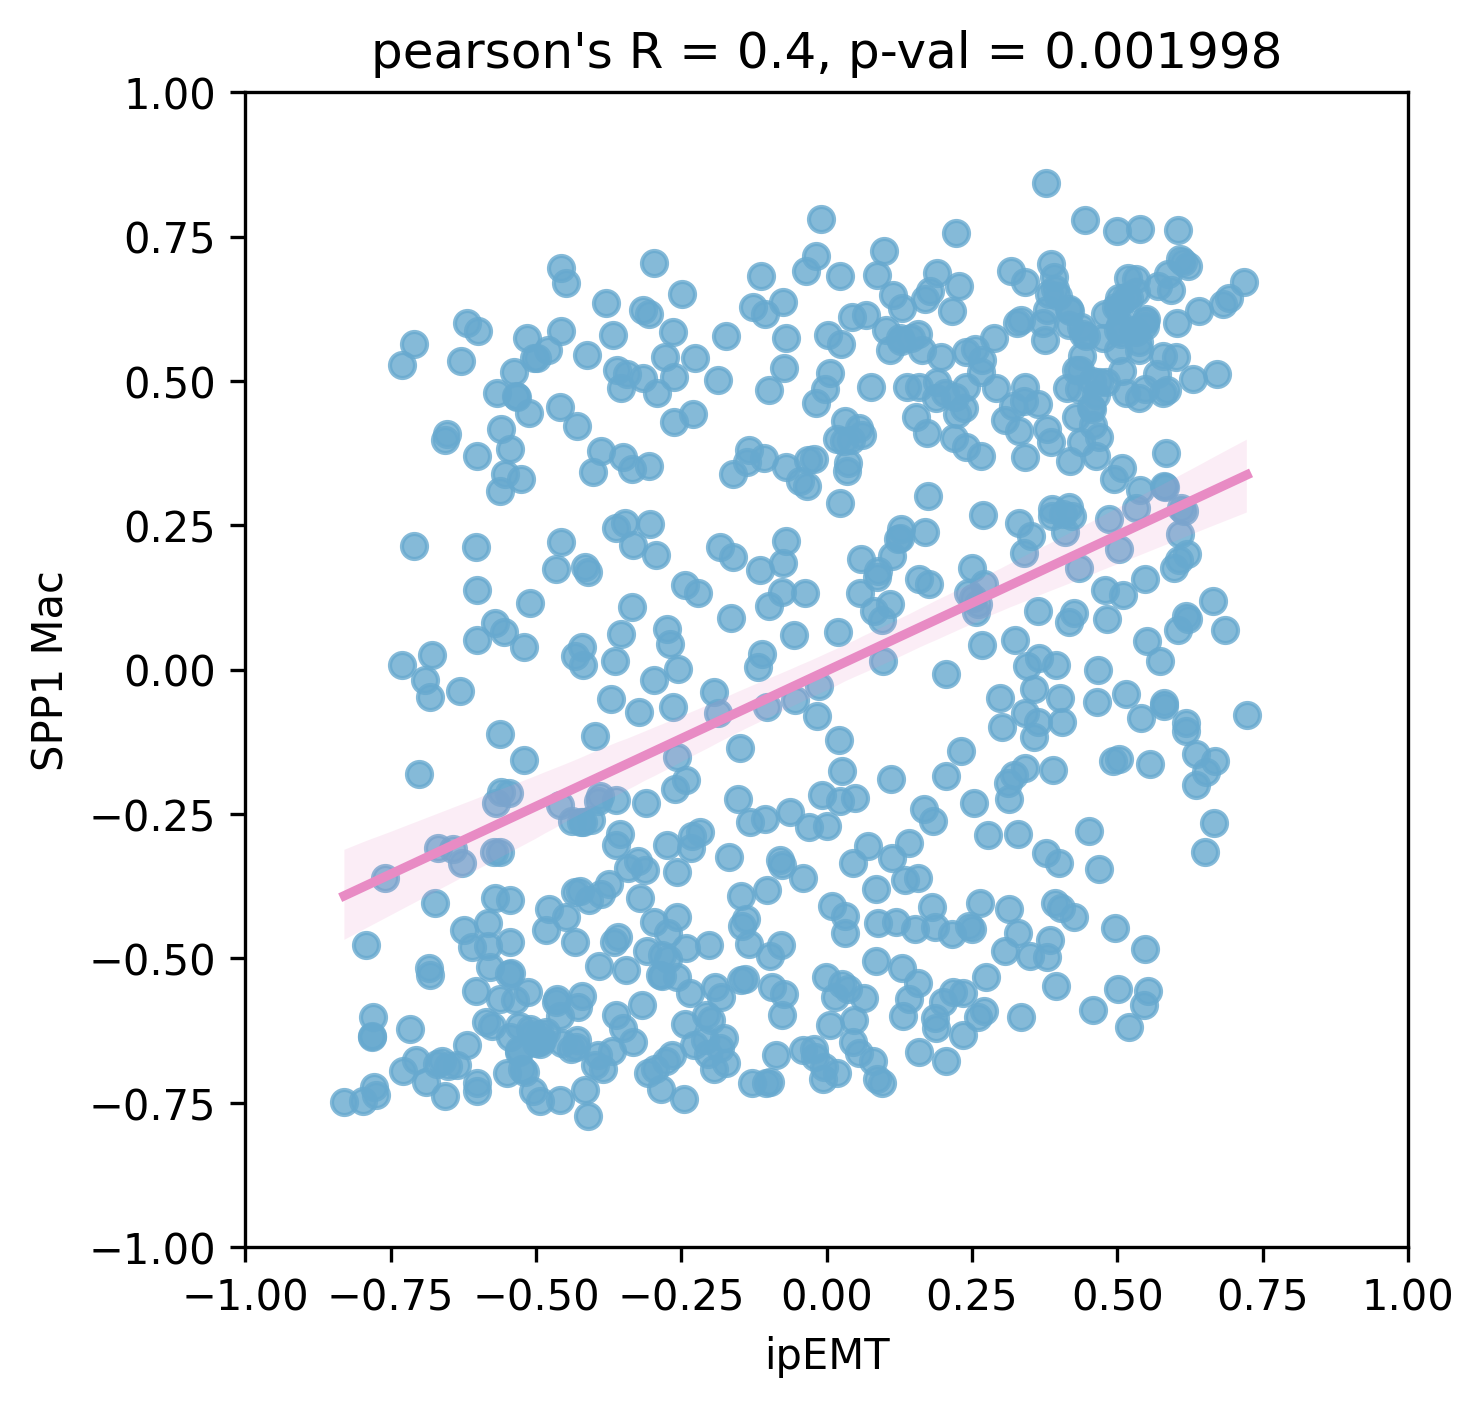

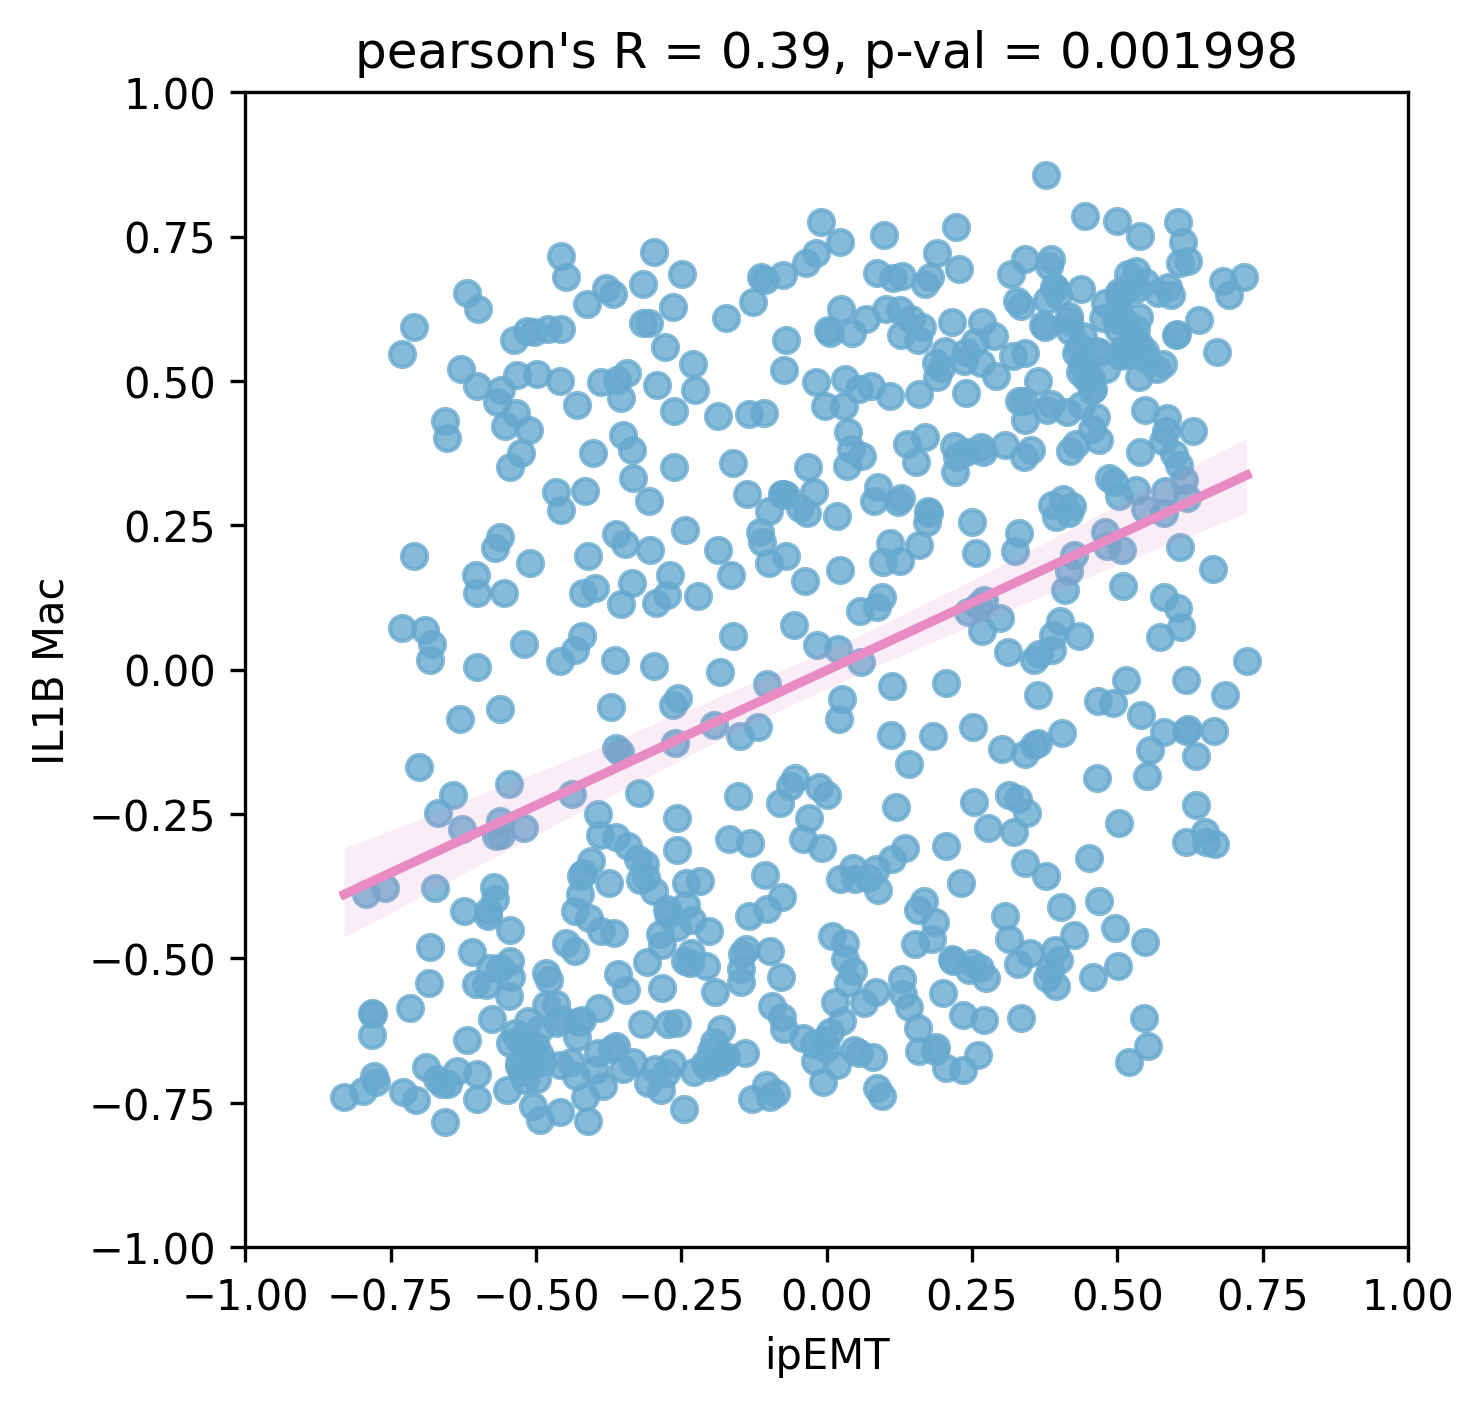

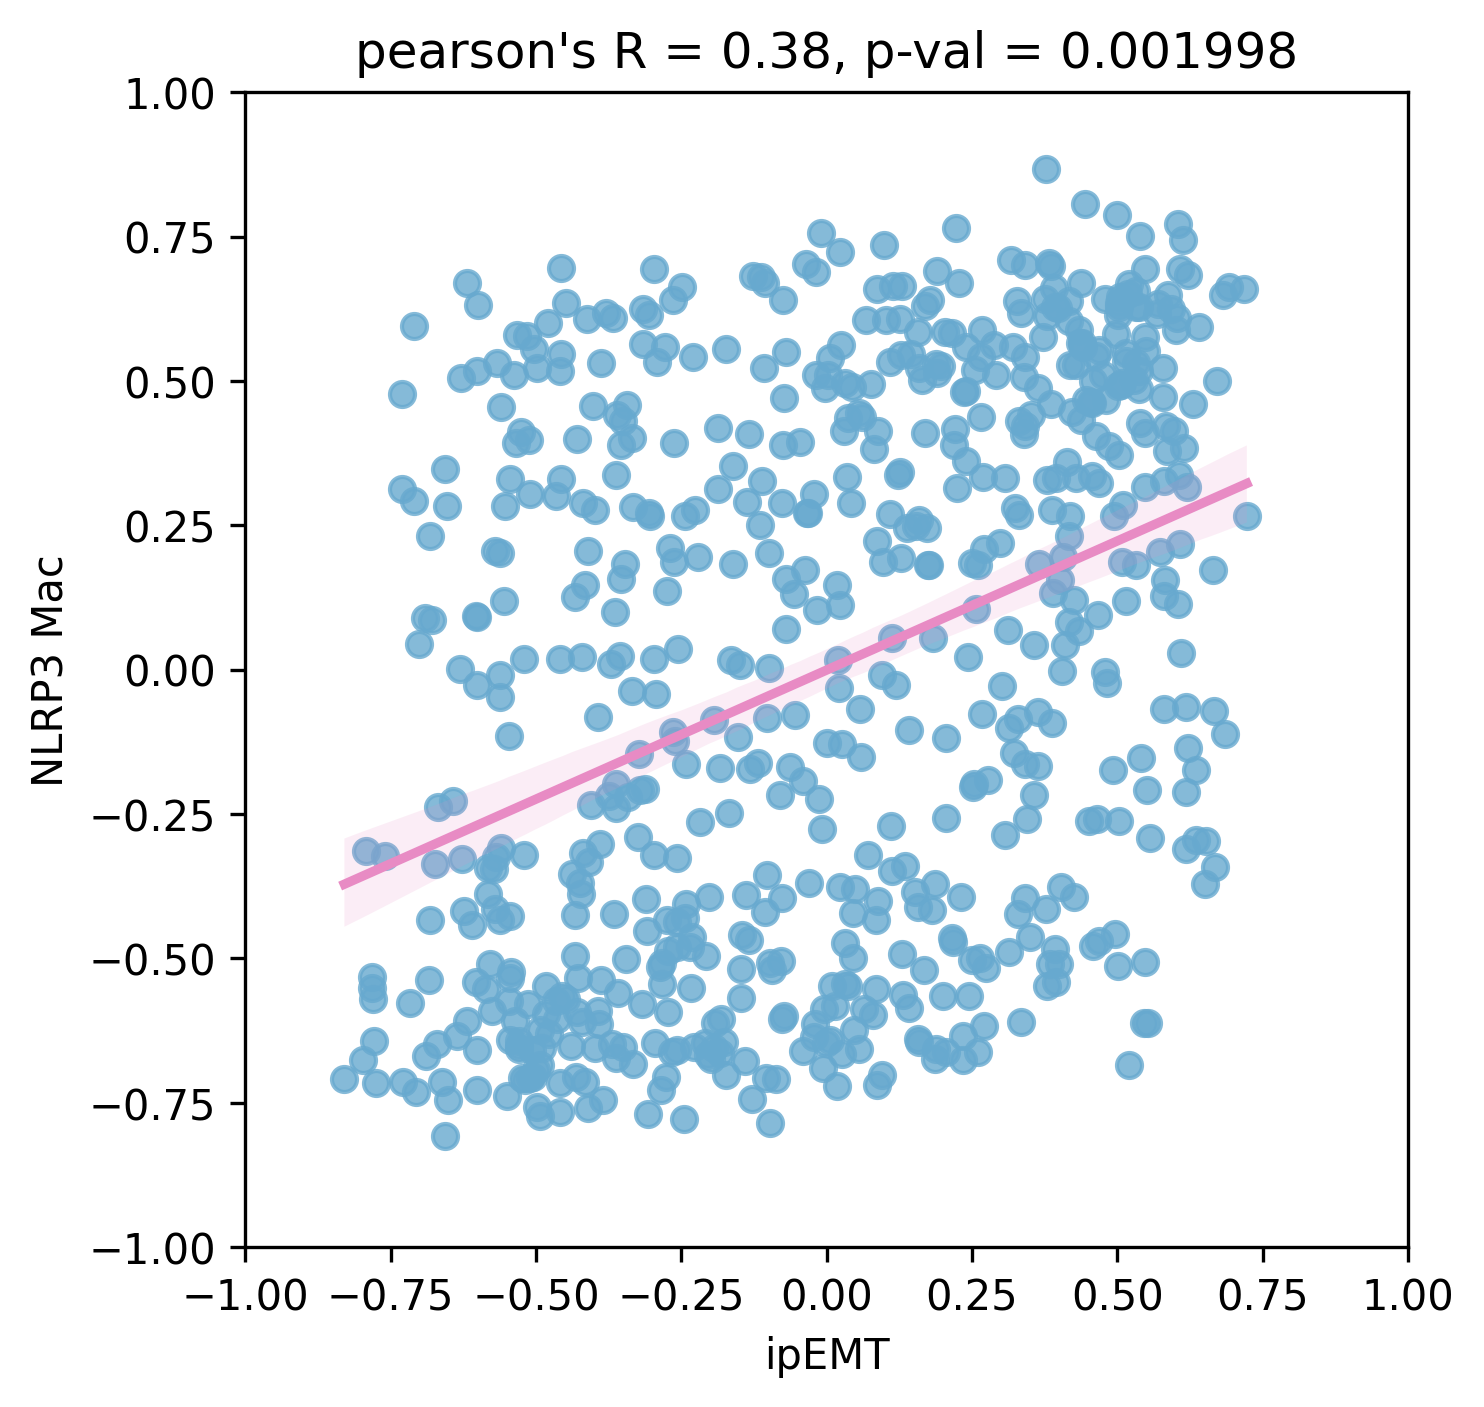

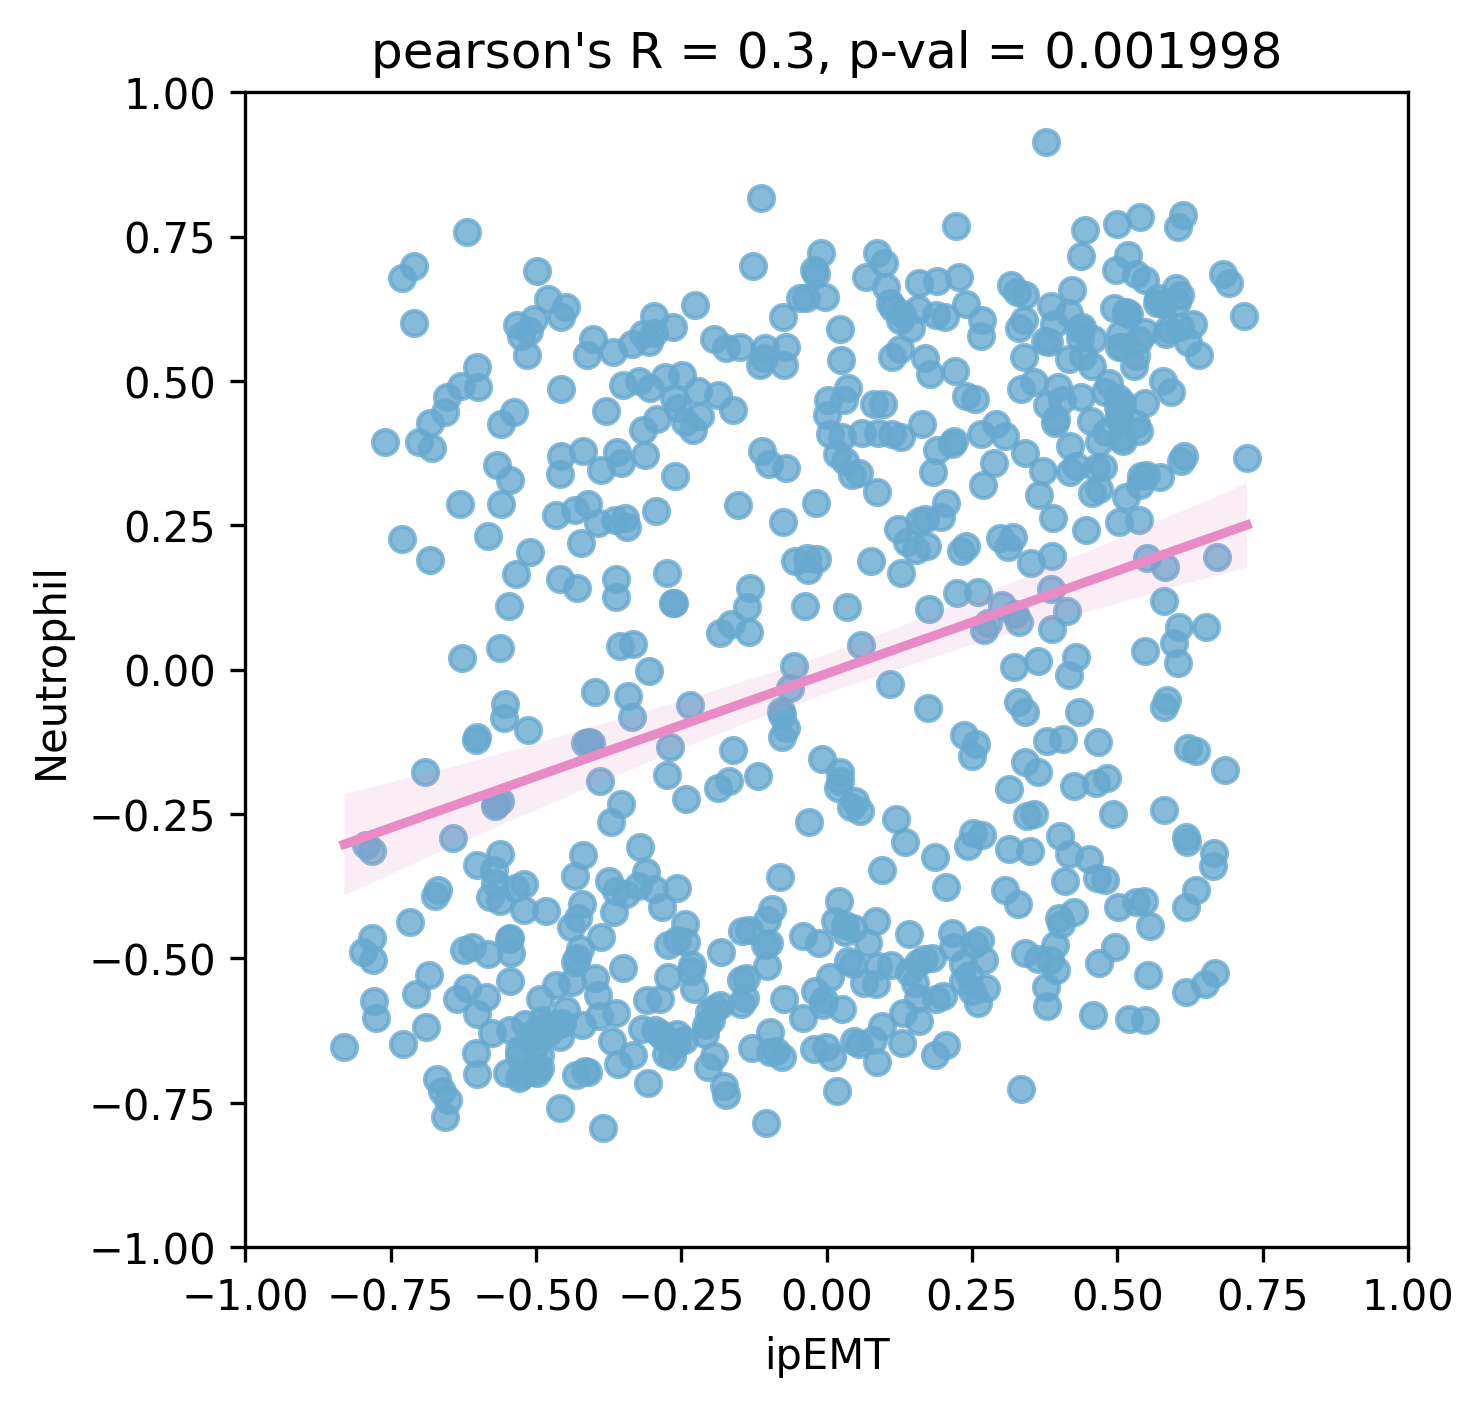

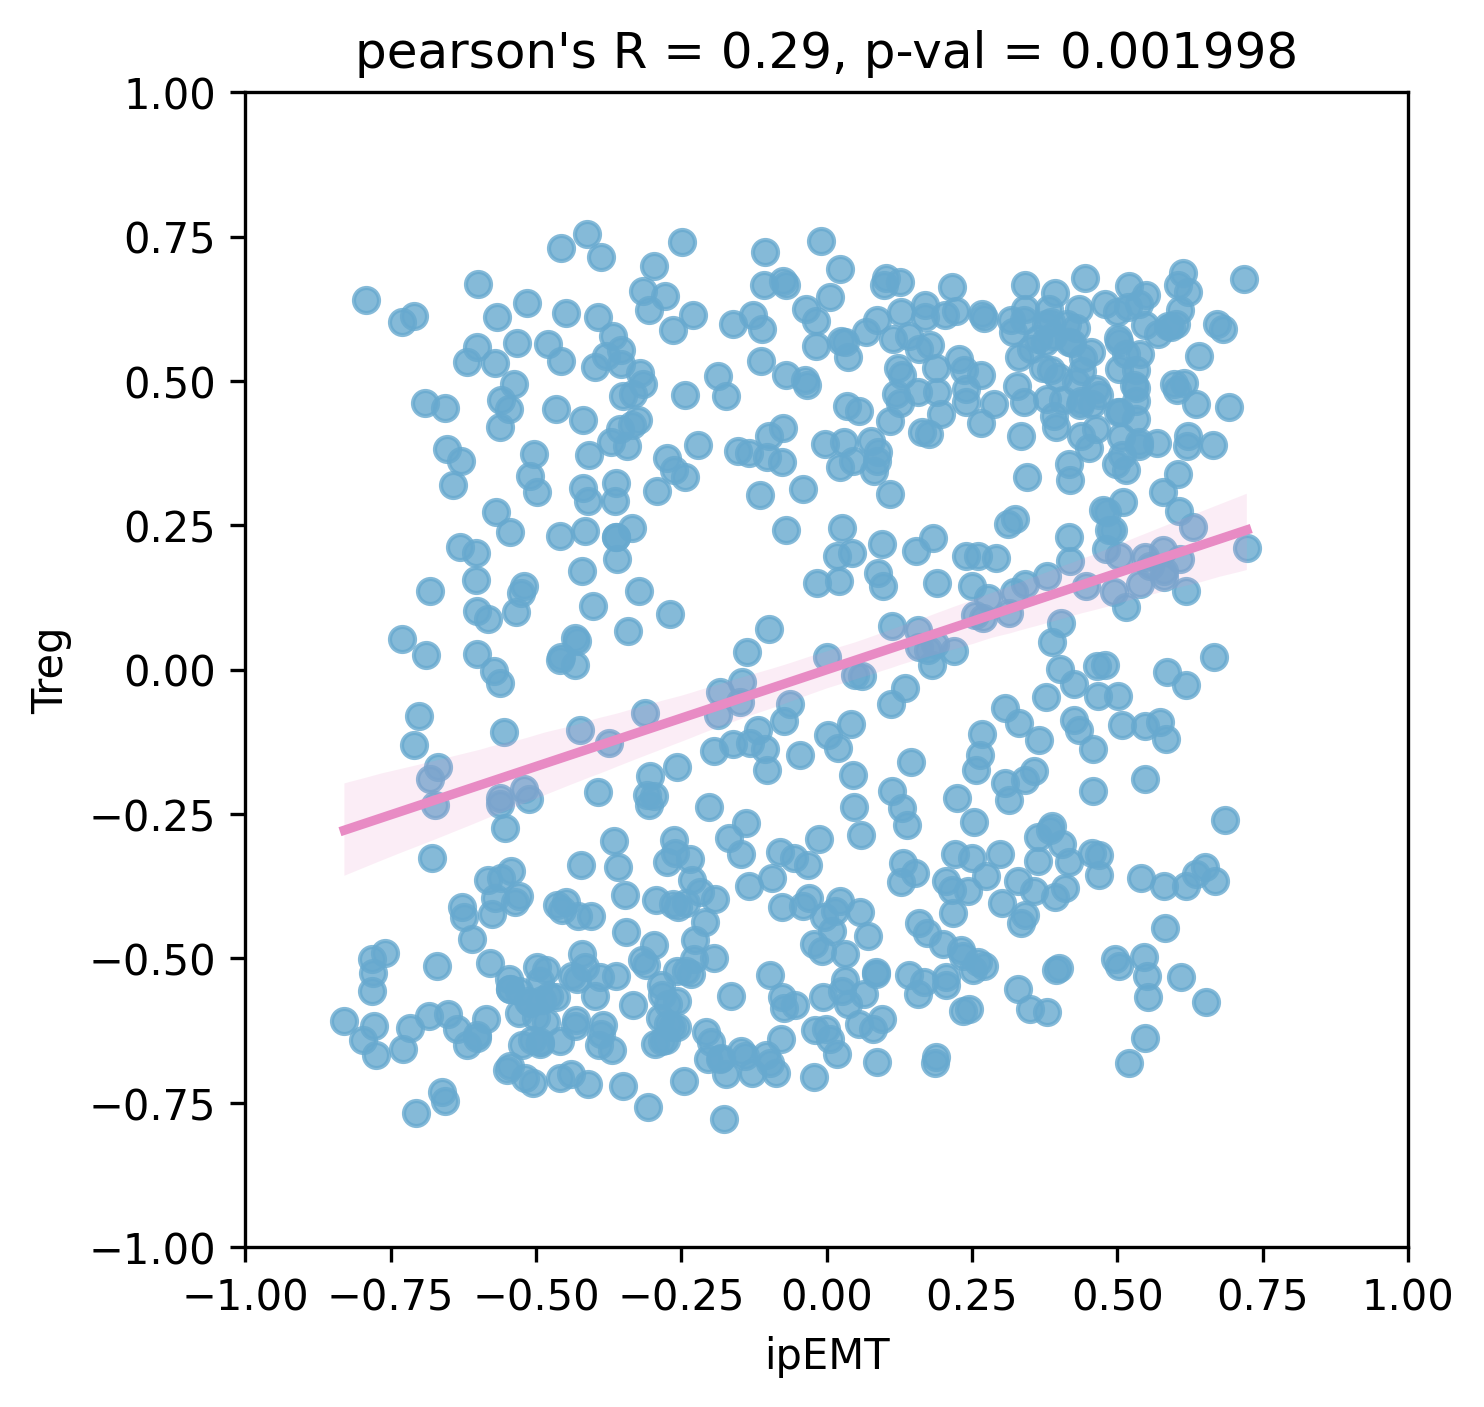

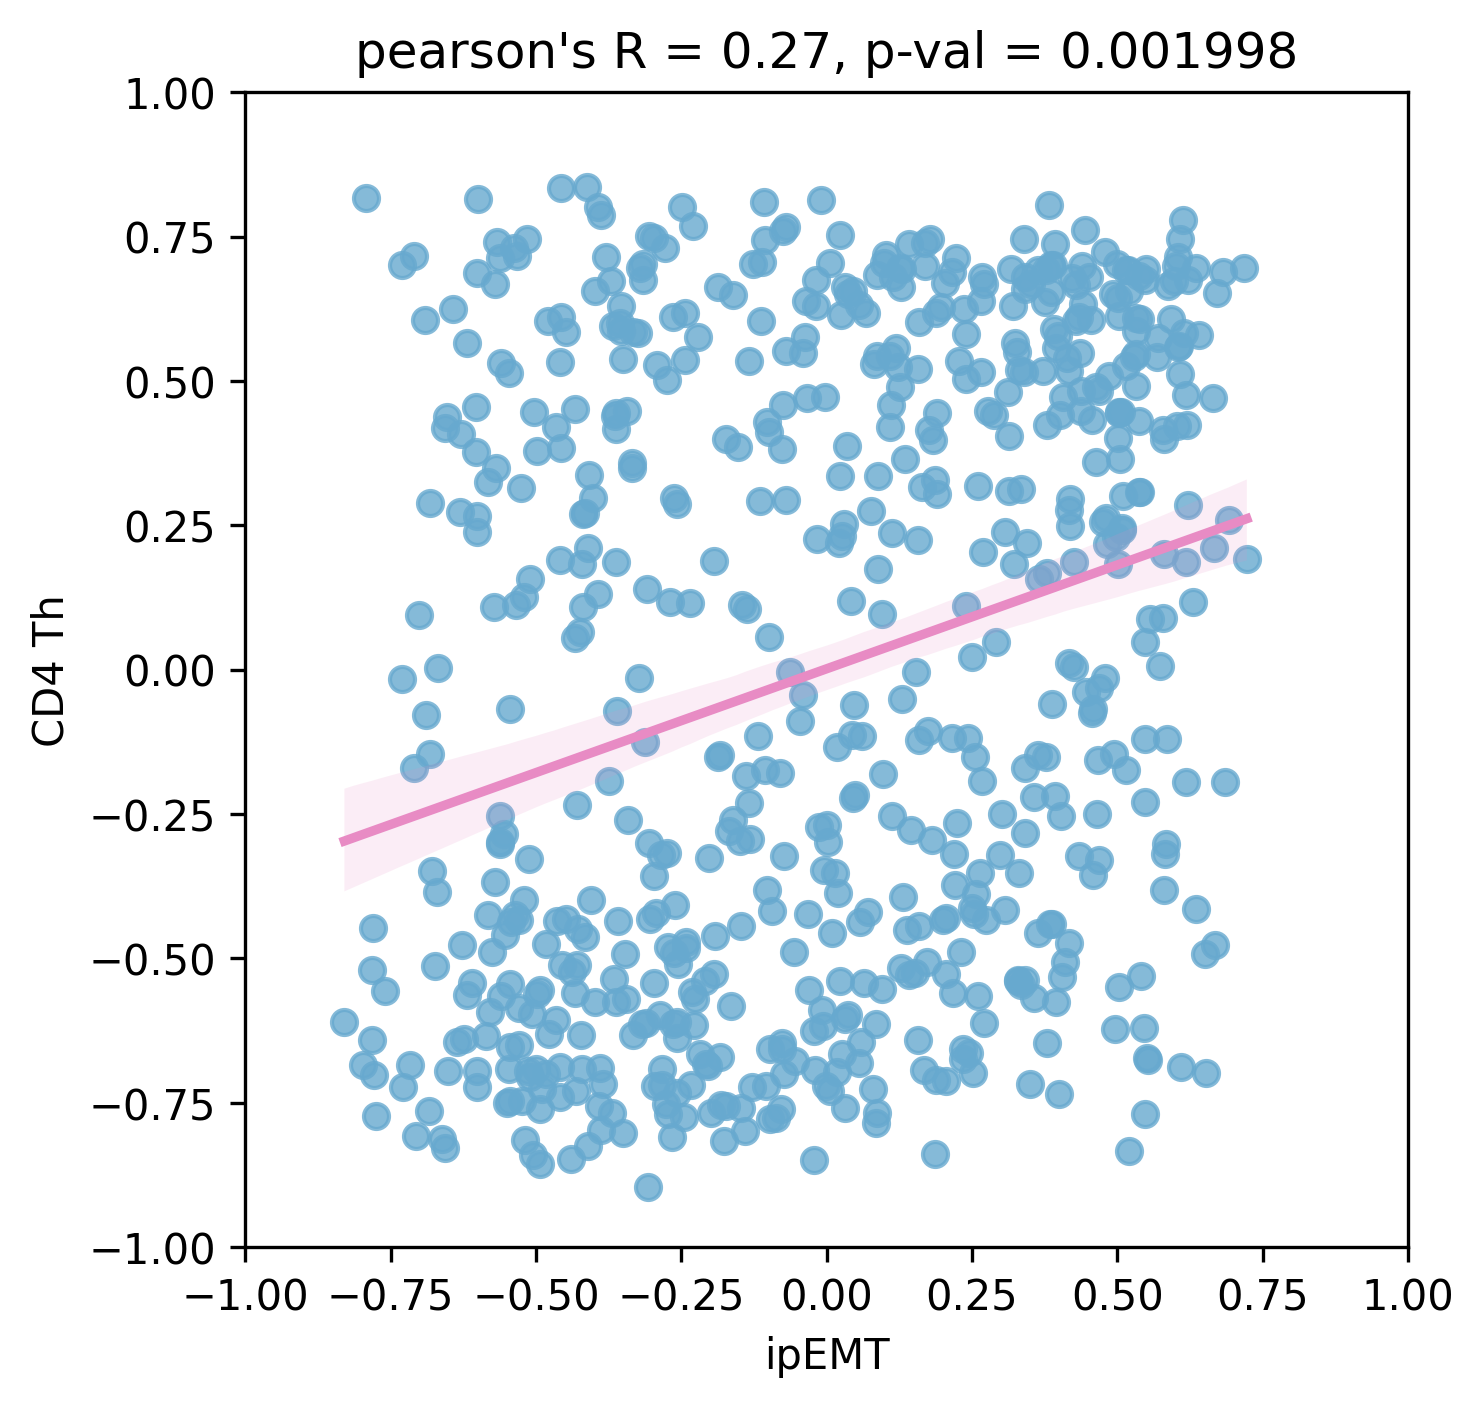

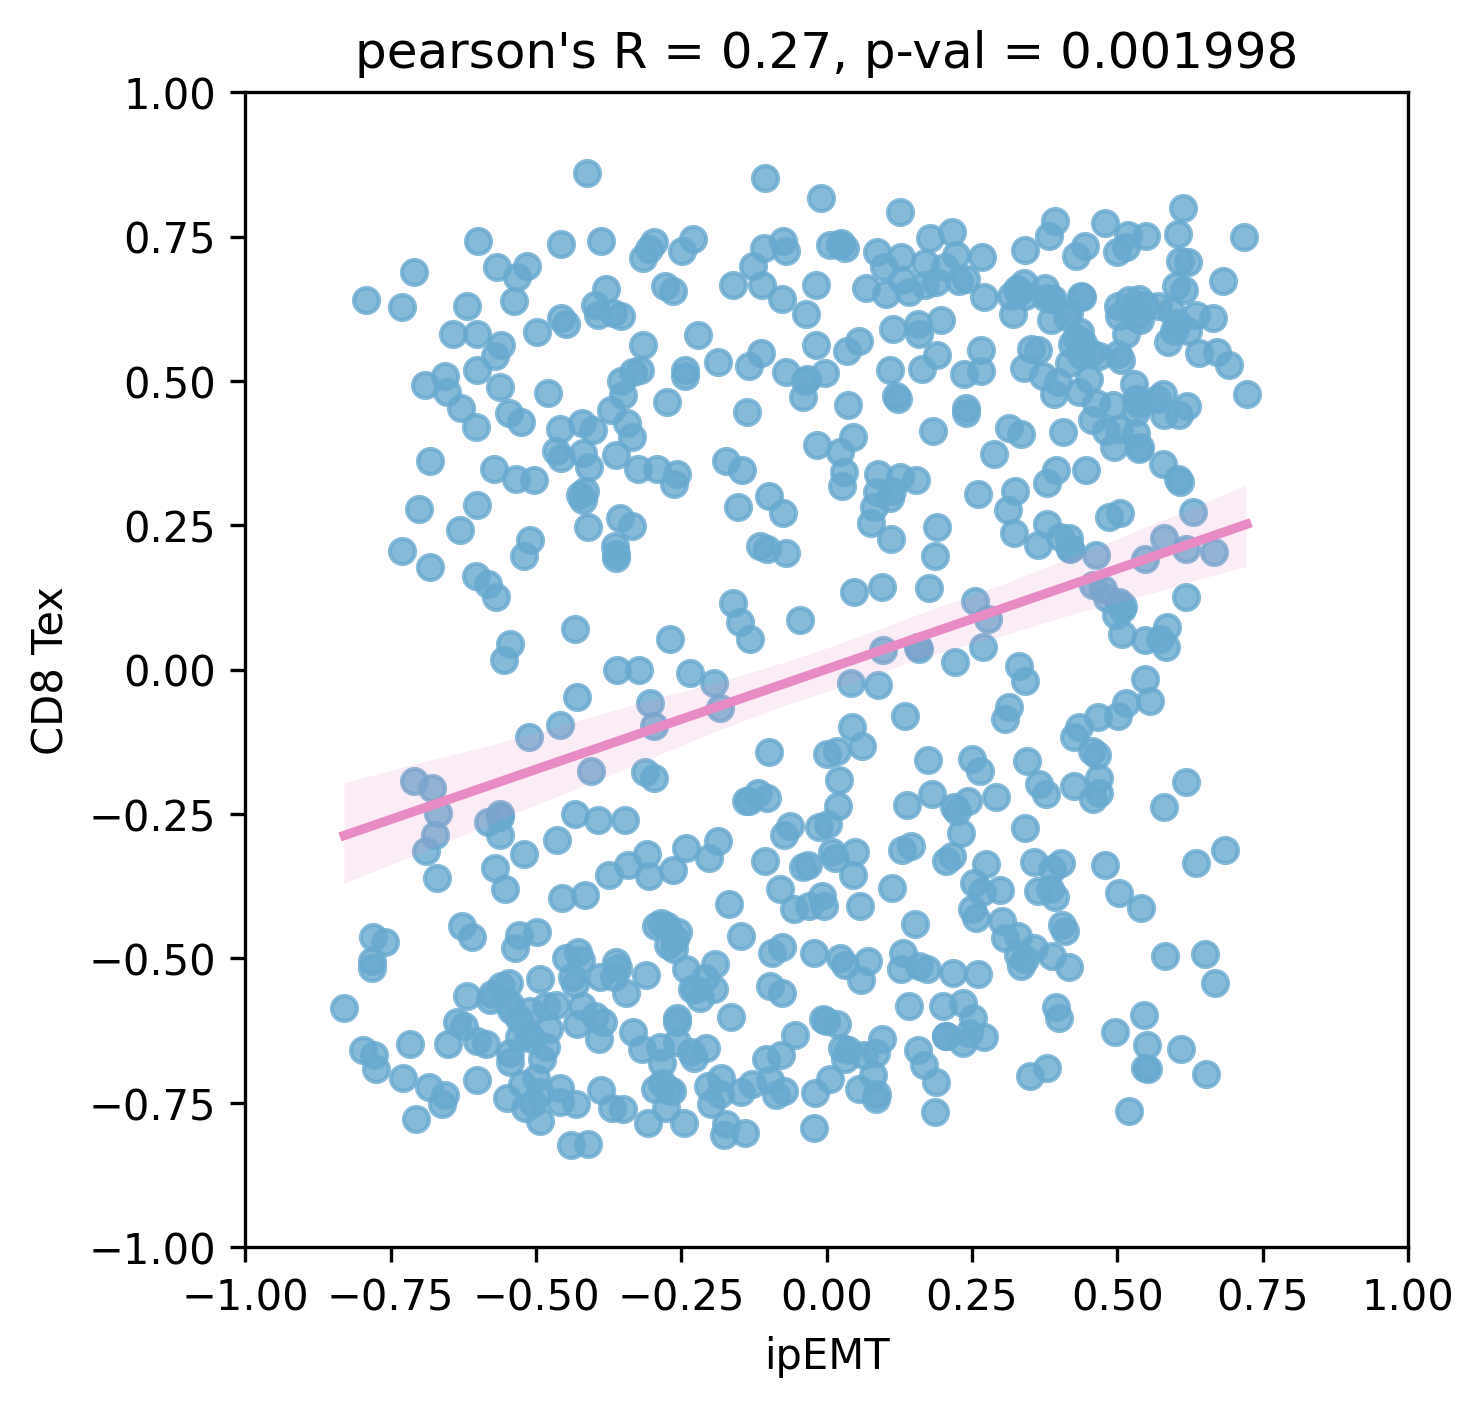

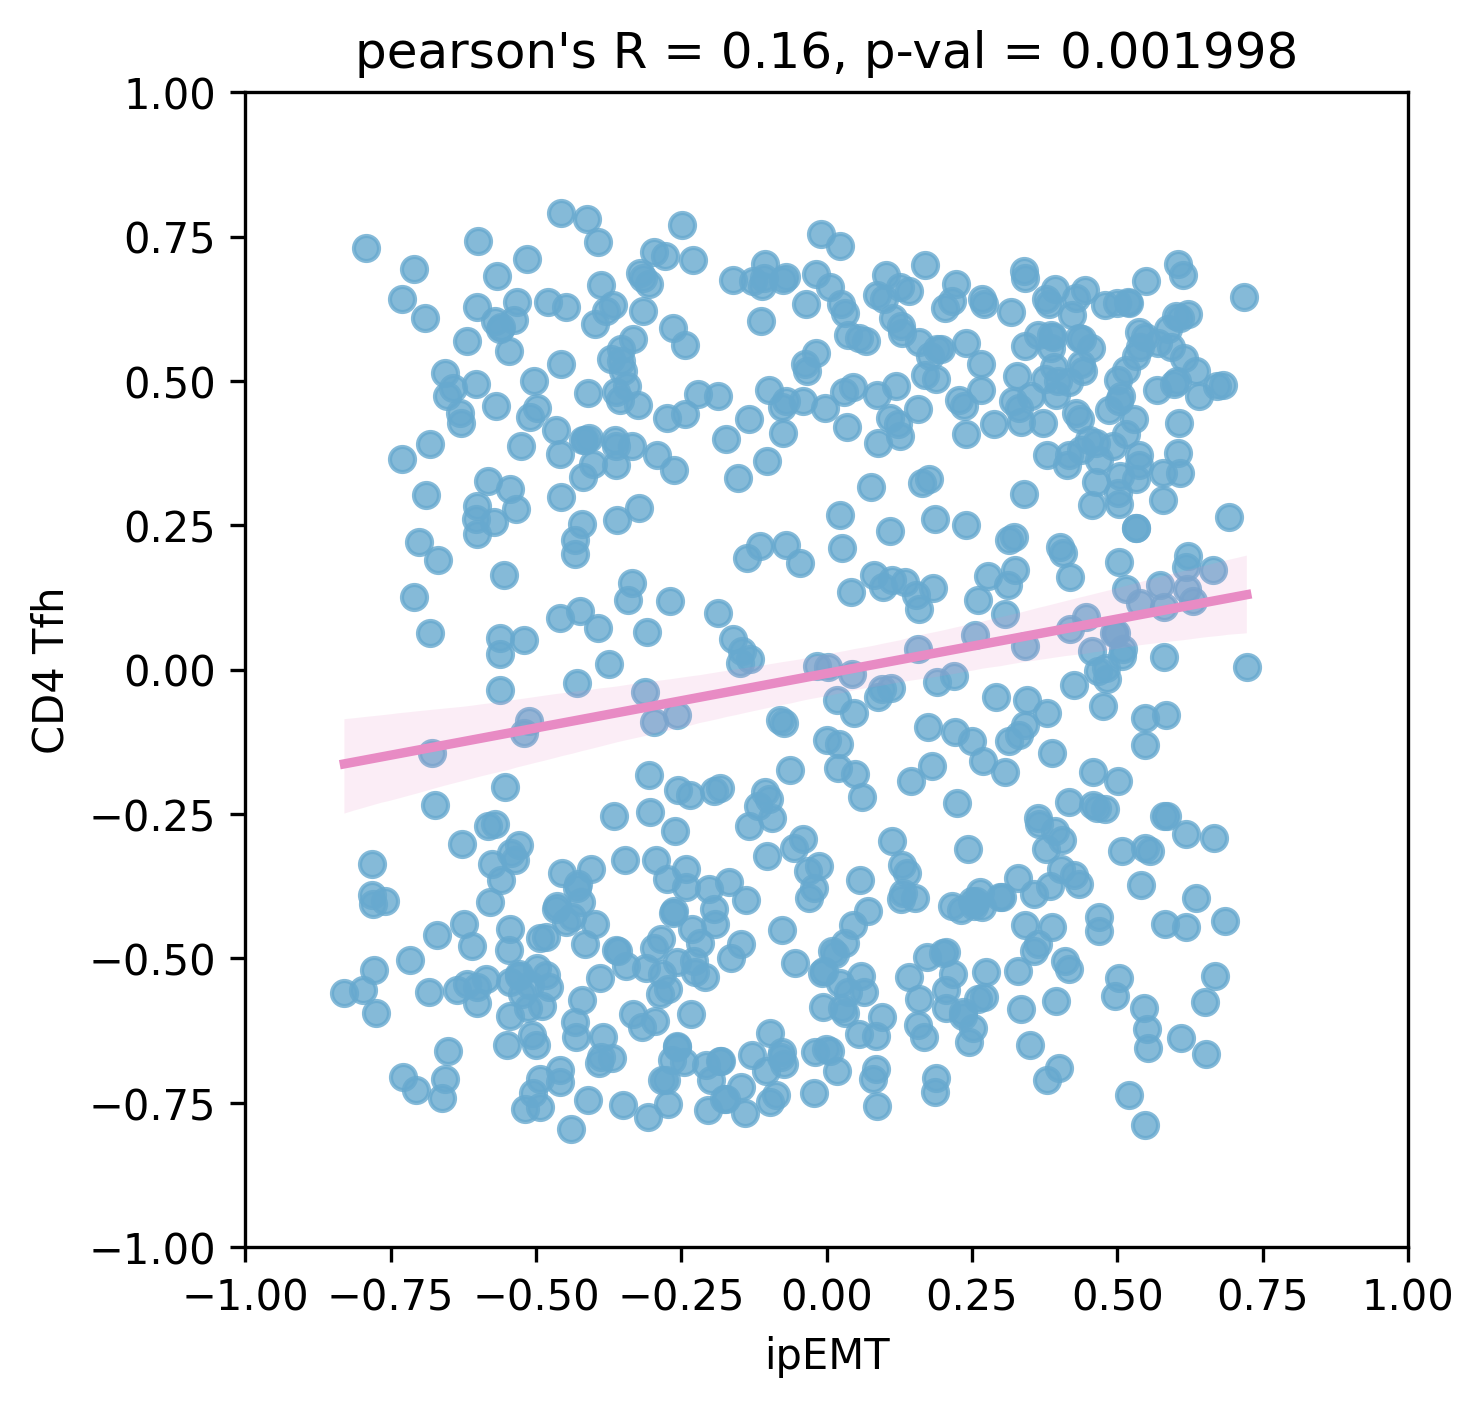

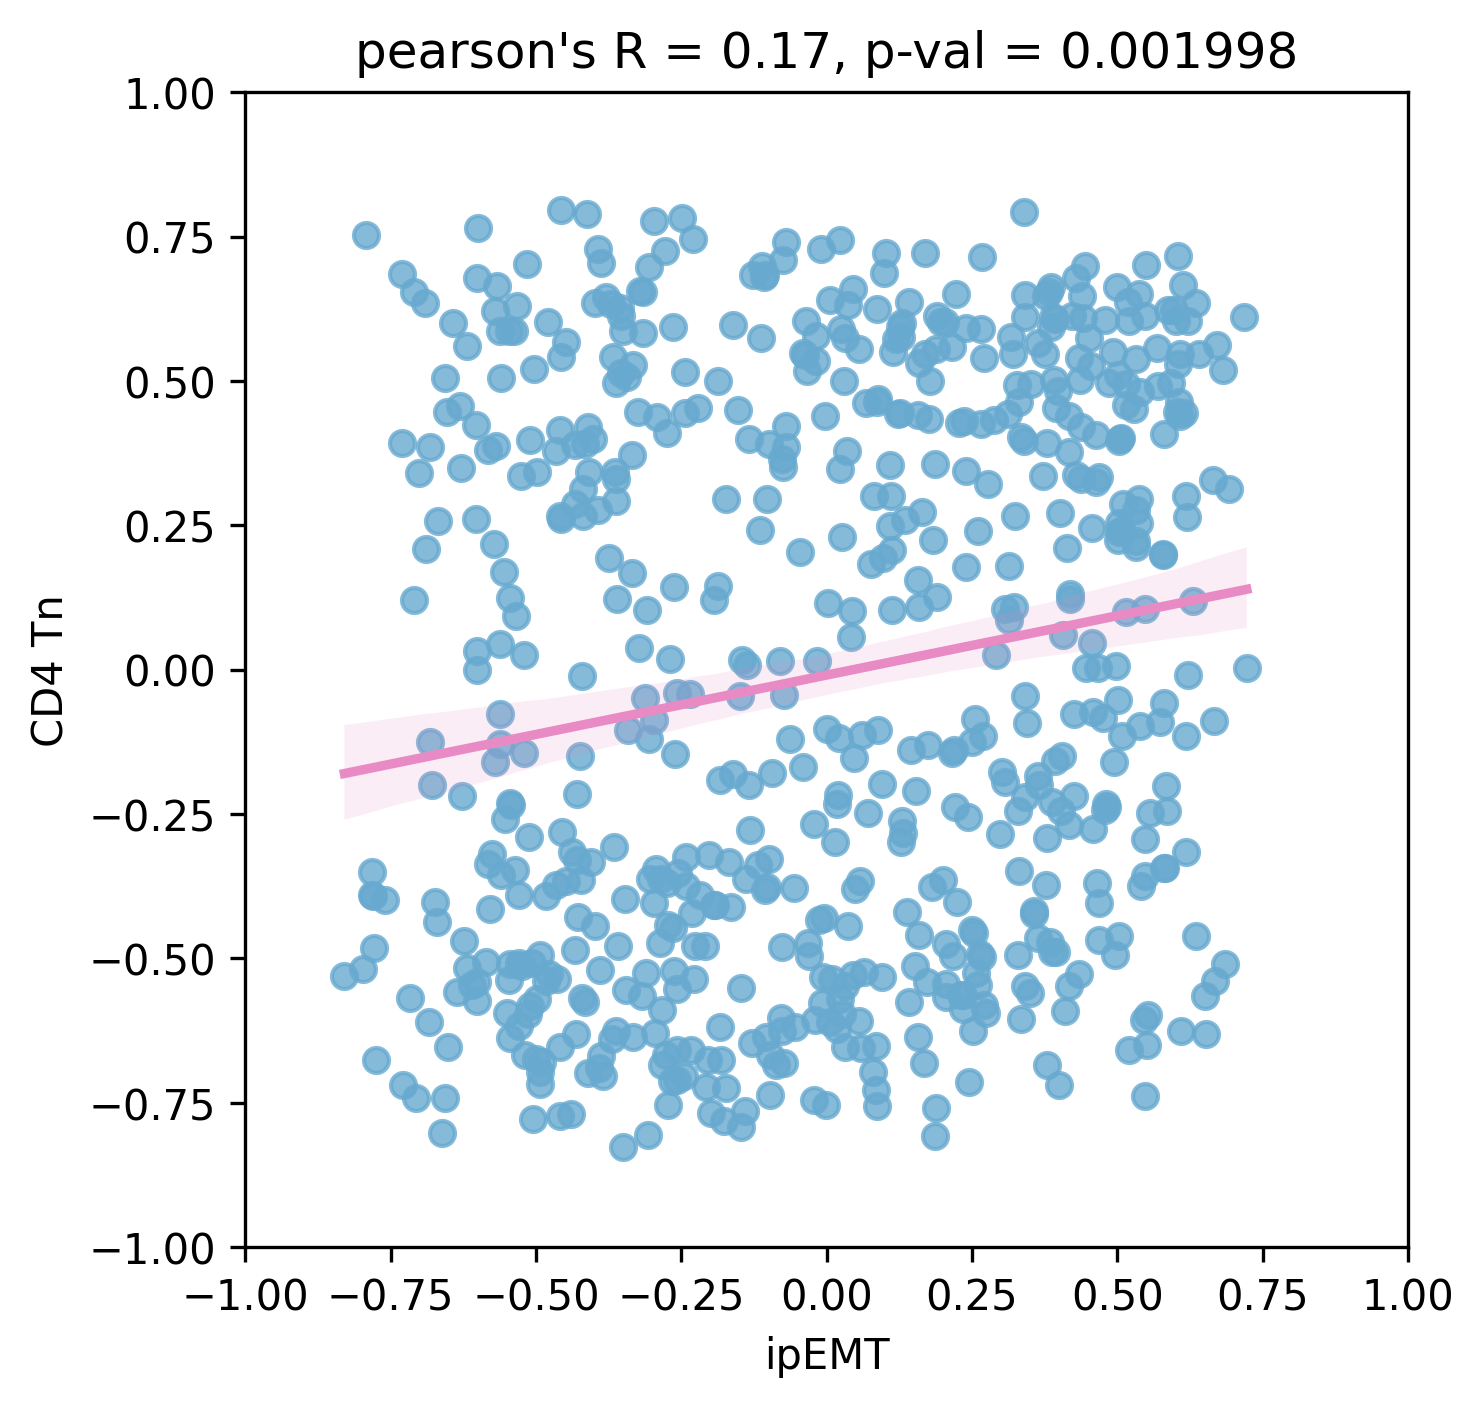

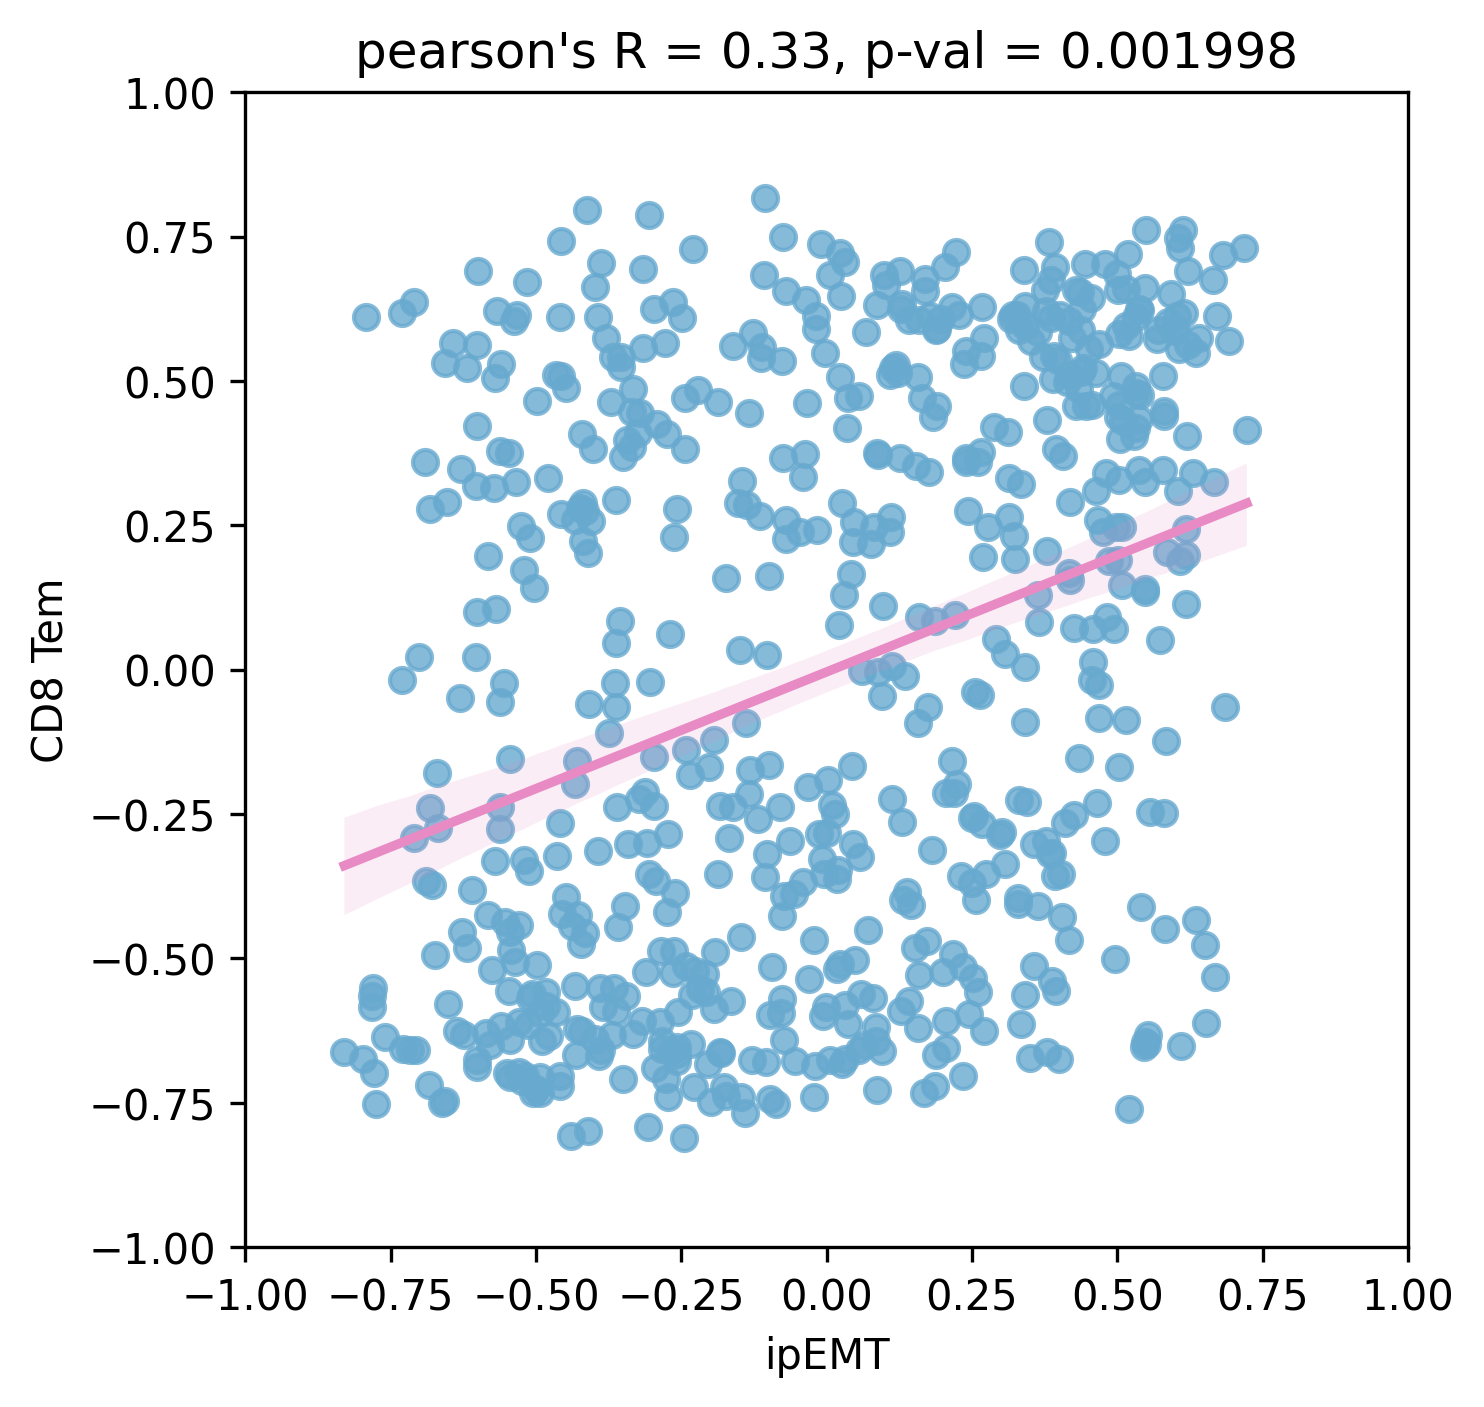

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
DPI=300

combinations_celltypes = [("ipEMT", "SPP1 Mac"), ("ipEMT", "IL1B Mac"), ("ipEMT", "NLRP3 Mac"),
                          ("ipEMT", "Neutrophil"), ("ipEMT", "Treg"), ("ipEMT", "CD4 Th"), ("ipEMT", "CD8 Tex"),
                          ("ipEMT", "CD4 Tfh"), ("ipEMT", "CD4 Tn"), ("ipEMT", "CD8 Tem"),
                         ]

for celltype2plot in combinations_celltypes:

    #celltype2plot = ("ipEMT", "SPP1 Mac")#('ipEMT', 'Stem (NOTUM high)')

    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, dpi=DPI, figsize=(5,5))

    sns.regplot(x=gsva_results[celltype2plot[0]], y=gsva_results[celltype2plot[1]], 
                ax=ax, 
                scatter=True, 
                fit_reg=True, 
                scatter_kws={'color': '#67A9CF'}, 
                line_kws={'color': '#E88BC4'})
    ax.set_title(f"{corr_method}'s R = {round(corr_df.loc[celltype2plot[0], celltype2plot[1]], ndigits=2)}, p-val = {round(pval_df.loc[celltype2plot[0], celltype2plot[1]], ndigits=6)}")
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)

    fig.savefig(FIG2SAVE.joinpath(f"TCGA_GSVA_celltype_signatures_{corr_method}_correlation_scattterplot_{genes2consider}_DE_genes_{corr_method}_RdBu_r_subset_iREC_{celltype2plot[0]}_{celltype2plot[1]}.pdf"), 
                dpi=DPI, 
                format="pdf",
                bbox_inches="tight")

In [50]:
genes2consider

100